In [1]:
# Importing necessary libraries
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from mplsoccer import Pitch, Sbopen
from statsbombpy import sb
import os
import pandas as pd
import json
#import Metrica_EPV as mepv
#import Metrica_Viz as mviz
#import Metrica_PitchControl as mpc

In [2]:
#open the data
parser = Sbopen()
#open the data
df_competition = parser.competition()

In [3]:
df_competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [4]:
df_match = parser.match(competition_id=55, season_id=282)

In [5]:
df_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3942819,2024-07-10,2024-07-10 22:00:00,1,2,available,available,2024-07-15 07:54:23.583297,2024-07-15 07:57:36.684453,6,...,15,Semi-finals,373,Signal-Iduna-Park,85,Germany,241,Felix Zwayer,85,Germany
1,3943043,2024-07-14,2024-07-14 22:00:00,2,1,available,available,2024-07-15 15:48:50.315500,2024-07-15 15:52:24.778809,7,...,26,Final,367,Olympiastadion Berlin,85,Germany,79,François Letexier,78,France
2,3942752,2024-07-09,2024-07-09 22:00:00,2,1,available,available,2024-07-10 08:51:07.032303,2024-07-10 13:01:26.597509,6,...,15,Semi-finals,4867,Allianz Arena,85,Germany,943,Slavko Vinčić,208,Slovenia
3,3942382,2024-07-06,2024-07-06 22:00:00,2,1,available,available,2024-07-10 06:50:04.068615,2024-07-10 06:56:35.146850,5,...,11,Quarter-finals,367,Olympiastadion Berlin,85,Germany,76,Clément Turpin,78,France
4,3942349,2024-07-05,2024-07-05 22:00:00,0,0,available,available,2024-07-12 01:57:15.210934,2024-07-12 02:00:16.871522,5,...,11,Quarter-finals,379,Volksparkstadion,85,Germany,1,Michael Oliver,68,England
5,3930180,2024-06-25,2024-06-25 19:00:00,2,3,available,available,2024-07-11 13:24:55.422159,2024-07-11 13:25:37.289456,3,...,10,Group Stage,367,Olympiastadion Berlin,85,Germany,941,Ivan Kružliak,207,Slovakia
6,3930171,2024-06-20,2024-06-20 19:00:00,1,1,available,available,2024-07-12 05:16:00.445930,2024-07-12 05:19:44.572914,2,...,10,Group Stage,116458,Deutsche Bank Park,85,Germany,2445,Artur Manuel Ribeiro Soares Dias,183,Portugal
7,3942227,2024-07-06,2024-07-06 19:00:00,1,1,available,available,2024-07-14 15:55:52.682165,2024-07-14 15:57:51.414762,5,...,11,Quarter-finals,4866,Merkur Spiel-Arena,85,Germany,269,Daniele Orsato,112,Italy
8,3942226,2024-07-05,2024-07-05 19:00:00,2,1,available,available,2024-07-13 03:52:05.176875,2024-07-13 03:52:43.383929,5,...,11,Quarter-finals,369,MHPArena,85,Germany,8,Anthony Taylor,68,England
9,3938645,2024-06-26,2024-06-26 19:00:00,0,0,available,available,2024-07-11 16:13:10.603169,2024-07-11 16:17:18.090189,3,...,10,Group Stage,369,MHPArena,85,Germany,8,Anthony Taylor,68,England


In [6]:
# Assuming df_match contains match data with match IDs
match_ids = df_match["match_id"].unique()

# Initialize a list to store the event data for each match
all_event_data = []

for match_id in match_ids:  # Loop over each match ID
    # Load event data for the match
    event_data = parser.event(match_id)[0]
    
    # Append the event data for this match to the list
    all_event_data.append(event_data)

# After the loop, concatenate all event data into a single DataFrame
# Assuming event_data for each match is a DataFrame
final_event_data = pd.concat(all_event_data, ignore_index=True)

In [7]:
final_event_data

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,ball_recovery_recovery_failure,block_offensive,foul_committed_offensive,shot_open_goal,dribble_no_touch,ball_recovery_offensive,pass_miscommunication,player_off_permanent,shot_follows_dribble,shot_redirect
0,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,1,00:00:00,0,0,1,0.000000,3942819,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e518d7a6-3360-4d94-aeef-661709bddf42,2,1,00:00:00,0,0,1,0.000000,3942819,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,1,00:00:00,0,0,1,0.000000,3942819,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,1,00:00:00,0,0,1,0.000000,3942819,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25dfc952-7a85-464f-b884-982064d46cc9,5,1,00:00:00.355000,0,0,2,2.455156,3942819,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187853,6ed1aa99-3539-41d1-9dcd-27badaa5e837,3369,2,00:47:32.605000,92,32,137,0.123032,3930158,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187854,2b19ee68-fd2c-4430-9e9b-1ae2d3b24388,3370,2,00:47:32.728000,92,32,138,0.000000,3930158,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187855,38454a4e-9146-4ea9-a030-a218f89577ec,3371,2,00:47:33.521000,92,33,138,0.000000,3930158,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187856,515ab531-213f-4adf-8940-b77de16a88d4,3372,2,00:48:39.800000,93,39,138,0.000000,3930158,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
final_event_data['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Miscontrol', 'Ball Recovery', 'Foul Committed',
       'Foul Won', 'Dribbled Past', 'Dribble', 'Block', 'Interception',
       'Duel', 'Goal Keeper', 'Clearance', 'Dispossessed', 'Shot',
       'Injury Stoppage', 'Player Off', 'Player On', 'Referee Ball-Drop',
       '50/50', 'Substitution', 'Tactical Shift', 'Half End',
       'Bad Behaviour', 'Shield', 'Error', 'Own Goal Against',
       'Own Goal For', 'Offside'], dtype=object)

In [8]:
# Path to the directory containing 360 JSON files
path_to_360_files = '/Users/fadihaddad/Documents/GitHub/open-data/data/three-sixty/' 

                    #PC file path
                    #r'C:\Users\PC\OneDrive\Documents\GitHub\open-data\data\three-sixty' 

                    #MAC file path
                    #'/Users/fadihaddad/Documents/GitHub/open-data/data/three-sixty/'

# Initialize a list to store the merged DataFrames
merged_data_list = []

# Iterate over all JSON files in the directory
for file_name in os.listdir(path_to_360_files):
    if file_name.endswith('.json'):
        try:
            # Load the 360 JSON file
            with open(os.path.join(path_to_360_files, file_name), 'r') as file:
                df_360 = pd.json_normalize(json.load(file))
            
            # Merge with event data
            merged_data = pd.merge(left=final_event_data, right=df_360, left_on='id', right_on='event_uuid', how='left')
            
            # Exclude rows where 'freeze_frame' is NaN after the merge
            merged_data_filtered = merged_data[merged_data['freeze_frame'].notna()]
            
            # Append the filtered merged DataFrame to the list
            merged_data_list.append(merged_data_filtered)
        except json.JSONDecodeError as e:
            continue  # Skip this file and continue with the next one

# Concatenate all merged DataFrames into a single DataFrame
if merged_data_list:
    final_merged_data = pd.concat(merged_data_list, ignore_index=True)
    print(f"Final merged data contains {len(final_merged_data)} rows")
else:
    final_merged_data = pd.DataFrame()  # Handle case where no data was merged
    print("No data was merged.")

# Inspect the merged DataFrame
#print(final_merged_data.head())

final_merged_data     

Final merged data contains 163521 rows


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,shot_open_goal,dribble_no_touch,ball_recovery_offensive,pass_miscommunication,player_off_permanent,shot_follows_dribble,shot_redirect,event_uuid,visible_area,freeze_frame
0,cfb45c51-8dbd-4a93-bba1-b4c9e5073ca4,5,1,00:00:00.905000,0,0,2,1.600293,3938644,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cfb45c51-8dbd-4a93-bba1-b4c9e5073ca4,"[22.571694954077827, 80.0, 44.351955063646436,...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,d723c08c-fb7d-4c85-95bd-2b662bd45f35,6,1,00:00:02.505000,0,2,2,NaN,3938644,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d723c08c-fb7d-4c85-95bd-2b662bd45f35,"[18.505402055145346, 80.0, 43.86164121503529, ...","[{'teammate': True, 'actor': True, 'keeper': F..."
2,2f0d9914-2537-4da5-ba37-89abb20c12c7,7,1,00:00:02.505000,0,2,2,1.216948,3938644,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2f0d9914-2537-4da5-ba37-89abb20c12c7,"[18.505402055145346, 80.0, 43.86164121503529, ...","[{'teammate': True, 'actor': True, 'keeper': F..."
3,8b3f0c76-c1cd-4132-baa5-a1541e563db5,8,1,00:00:03.722000,0,3,2,2.991699,3938644,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8b3f0c76-c1cd-4132-baa5-a1541e563db5,"[18.219359387720615, 80.0, 43.74623142864928, ...","[{'teammate': True, 'actor': False, 'keeper': ..."
4,5490ce1b-d1bc-4100-b21b-c3d18820eee0,9,1,00:00:06.714000,0,6,2,NaN,3938644,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5490ce1b-d1bc-4100-b21b-c3d18820eee0,"[32.56327739476208, 74.02704532959183, 0.0, 8....","[{'teammate': True, 'actor': False, 'keeper': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163516,5cb223ab-9c0a-4dfe-890a-705d5b3e3b7f,3975,2,00:51:07.004000,96,7,157,0.456164,3930172,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5cb223ab-9c0a-4dfe-890a-705d5b3e3b7f,"[108.37710577221051, 67.28258778648144, 87.207...","[{'teammate': True, 'actor': False, 'keeper': ..."
163517,cba73004-41f6-4f07-b702-a021577ffaf9,3976,2,00:51:07.460000,96,7,157,NaN,3930172,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cba73004-41f6-4f07-b702-a021577ffaf9,"[0.0, 80.0, 0.0, 27.230338525143118, 9.7670462...","[{'teammate': True, 'actor': False, 'keeper': ..."
163518,69dddfac-38d6-4550-bfc4-868603bacecc,3977,2,00:51:07.460000,96,7,157,0.000000,3930172,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69dddfac-38d6-4550-bfc4-868603bacecc,"[0.0, 80.0, 0.0, 27.230338525143118, 9.7670462...","[{'teammate': True, 'actor': False, 'keeper': ..."
163519,fdfe0951-df5a-41ce-9b67-c08bed4dbdde,3978,2,00:51:08.842000,96,8,157,0.000000,3930172,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fdfe0951-df5a-41ce-9b67-c08bed4dbdde,"[103.11169422020083, 61.78356133186965, 82.759...","[{'teammate': True, 'actor': False, 'keeper': ..."


In [30]:
final_merged_data_with_tracking['freeze_frame']

0         [{'teammate': True, 'actor': False, 'keeper': ...
1         [{'teammate': True, 'actor': False, 'keeper': ...
2         [{'teammate': True, 'actor': False, 'keeper': ...
3         [{'teammate': True, 'actor': False, 'keeper': ...
4         [{'teammate': True, 'actor': False, 'keeper': ...
                                ...                        
163516    [{'teammate': False, 'actor': False, 'keeper':...
163517    [{'teammate': True, 'actor': True, 'keeper': T...
163518    [{'teammate': True, 'actor': False, 'keeper': ...
163519    [{'teammate': True, 'actor': False, 'keeper': ...
163520    [{'teammate': True, 'actor': False, 'keeper': ...
Name: freeze_frame, Length: 163521, dtype: object

In [11]:
final_merged_data['type_name'].unique()

array(['Pass', 'Ball Receipt', 'Carry', 'Duel', 'Ball Recovery',
       'Pressure', 'Block', 'Clearance', 'Interception', 'Dribble',
       'Dispossessed', 'Miscontrol', 'Foul Committed', 'Foul Won',
       '50/50', 'Shot', 'Goal Keeper', 'Dribbled Past', 'Error',
       'Own Goal For', 'Own Goal Against', 'Shield', 'Offside',
       'Referee Ball-Drop'], dtype=object)

In [13]:
Carries = final_merged_data[final_merged_data['type_name'] == 'Carry']
Carries['outcome_name'].unique()

array([nan], dtype=object)

In [10]:
# List of required columns
required_columns = ["match_id", "id", "index", "period", "minute", "second", 'duration', "team_name", "player_name", 
                    "position_name", "type_name", "outcome_name", "sub_type_name", "under_pressure", 
                    "pass_shot_assist", "pass_goal_assist", "pass_cross", "pass_cut_back", "pass_switch", 
                    "aerial_won", "pass_recipient_name", "pass_length", "pass_angle", "body_part_name", 
                    "play_pattern_name", "x", "y", "end_x", "end_y", "visible_area", "freeze_frame", "event_uuid"]

# Initialize an empty DataFrame for storing concatenated passes
actions_df = pd.DataFrame()

# Iterate over the matches
for match_id in match_ids:
    
    # Iterate over the periods
    for period in [1, 2]:
        # Filter the data for the specific match, period, and passes with null outcomes
        mask_all_teams_actions = (final_merged_data["match_id"] == match_id) & \
                                (final_merged_data["period"] == period) & \
                                (final_merged_data["type_name"].isin(['Ball Receipt', 'Pass', 'Shot'])) & \
                                (final_merged_data["outcome_name"].isnull()) & \
                                ~final_merged_data['sub_type_name'].isin(['Goal Kick', 'Throw-in', 'Free Kick', 'Corner'])
    
        # Filter only the existing columns
        filtered_data = final_merged_data.loc[mask_all_teams_actions, 
                                              [col for col in required_columns if col in final_merged_data.columns]]
    
        # Concatenate the filtered data directly into the passes_df DataFrame
        actions_df = pd.concat([actions_df, filtered_data], ignore_index=True)

# Inspect the final passes DataFrame
actions_df

,match_id,id,index,period,minute,second,duration,team_name,player_name,position_name,...,pass_angle,body_part_name,play_pattern_name,x,y,end_x,end_y,visible_area,freeze_frame,event_uuid
0,3942819,25dfc952-7a85-464f-b884-982064d46cc9,5,1,0,0,2.455156,England,Kobbie Mainoo,Right Defensive Midfield,...,-2.982596,Right Foot,From Kick Off,60.0,40.0,25.7,34.5,"[82.05880352279489, 80.0, 37.469993200629204, ...","[{'teammate': True, 'actor': False, 'keeper': ...",25dfc952-7a85-464f-b884-982064d46cc9
1,3942819,85328a9c-e246-4273-b566-353b64d902a1,6,1,0,2,NaN,England,Jordan Pickford,Goalkeeper,...,NaN,NaN,From Kick Off,25.7,34.5,NaN,NaN,"[79.67044795748183, 80.0, 38.490725216644606, ...","[{'teammate': True, 'actor': True, 'keeper': T...",85328a9c-e246-4273-b566-353b64d902a1
2,3942819,a53891bd-f254-4786-adee-ec2ecd78e857,12,1,0,11,2.247506,England,John Stones,Center Back,...,0.316825,Head,From Kick Off,60.7,43.3,85.1,51.3,"[84.87329142496212, 77.05638219685684, 50.6812...","[{'teammate': True, 'actor': False, 'keeper': ...",a53891bd-f254-4786-adee-ec2ecd78e857
3,3942819,62db25e5-9ec0-4ff7-b343-28f6af5d0039,14,1,0,13,NaN,England,Harry Kane,Center Forward,...,NaN,NaN,From Kick Off,85.1,51.3,NaN,NaN,"[89.0534865642035, 77.65588171523805, 56.20721...","[{'teammate': True, 'actor': False, 'keeper': ...",62db25e5-9ec0-4ff7-b343-28f6af5d0039
4,3942819,0ecf99d0-bdb8-48f0-98f4-a56bd7e6ec01,24,1,0,24,NaN,Netherlands,Virgil van Dijk,Left Center Back,...,NaN,NaN,From Free Kick,37.1,24.1,NaN,NaN,"[10.739331211515132, 80.0, 40.134827170894965,...","[{'teammate': True, 'actor': True, 'keeper': F...",0ecf99d0-bdb8-48f0-98f4-a56bd7e6ec01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75897,3930158,c8865f0b-b0ae-46fb-9881-d0c9cdbee8a0,3360,2,92,29,NaN,Germany,Leroy Sané,Right Wing,...,NaN,NaN,Regular Play,99.2,19.2,NaN,NaN,"[91.62260143169532, 66.77840545014374, 75.2573...","[{'teammate': True, 'actor': False, 'keeper': ...",c8865f0b-b0ae-46fb-9881-d0c9cdbee8a0
75898,3930158,41424045-5ee8-4bd5-b3ed-57d042439a23,3362,2,92,29,0.811935,Germany,Leroy Sané,Right Wing,...,0.392340,Left Foot,Regular Play,98.7,19.1,110.3,23.9,"[90.50342204546739, 67.5482144480265, 73.95483...","[{'teammate': True, 'actor': False, 'keeper': ...",41424045-5ee8-4bd5-b3ed-57d042439a23
75899,3930158,cadaaaca-6fad-4d93-a97c-31d2a8321e24,3364,2,92,30,NaN,Germany,Thomas Müller,Left Wing,...,NaN,NaN,Regular Play,110.3,23.9,NaN,NaN,"[92.6412266150823, 67.74746503814812, 76.14211...","[{'teammate': True, 'actor': False, 'keeper': ...",cadaaaca-6fad-4d93-a97c-31d2a8321e24
75900,3930158,e4e23d31-0422-4527-b0ba-7ff04e7e1fde,3365,2,92,30,1.390506,Germany,Thomas Müller,Left Wing,...,2.577395,Right Foot,Regular Play,109.3,28.5,96.5,36.6,"[91.6412266150823, 72.34746541961785, 75.14211...","[{'teammate': True, 'actor': False, 'keeper': ...",e4e23d31-0422-4527-b0ba-7ff04e7e1fde


In [16]:
def calc_event_velocities(actions_df, final_event_data, maxspeed=13.8, position_tolerance=30, formation_tolerance=15):
    """
    Calculate player velocities for Pass, Ball Receipt, and Shot events based on player positions,
    including non-involved players using freeze frame data from the current and next events.
    Incorporates team movement and formation considerations.
    
    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing event data with player positions and freeze frame data.
    final_event_data : DataFrame
        DataFrame containing all events, including those without freeze frame data.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.
    position_tolerance : float
        Tolerance distance to match pass recipient's position with the end_x, end_y of the pass.
    formation_tolerance : float
        Tolerance for maintaining the team's formation when tracking player movements.
    
    Returns:
    --------
    actions_df : DataFrame
        DataFrame with additional velocity columns (vx, vy, speed) for involved players.
    non_involved_velocities : dict
        Dictionary storing velocities of non-involved players for each event, keyed by (match_id, event_id).
    """
    
    # Ensure the DataFrame has the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration', 'type_name', 'pass_recipient_name', 'freeze_frame', 'match_id', 'index']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Initialize new velocity columns for involved players
    actions_df['vx'], actions_df['vy'], actions_df['speed'] = np.nan, np.nan, np.nan
    
    # Dictionary to store non-involved players' velocities
    non_involved_velocities = {}
    
    # Calculate velocities
    for idx, row in actions_df.iterrows():
        involved_velocity_calculated = False  # Track if velocity for the involved player has been calculated
        match_id = row['match_id']  # Use match_id for uniqueness
        event_id = row['index']     # Event ID to track non-involved player velocities
        
        # Store non-involved player velocities for this event, keyed by (match_id, event_id)
        non_involved_velocities[(match_id, event_id)] = []
        
        # Handle Pass, Ball Receipt, and Shot events
        if row['type_name'] in ['Pass', 'Shot', 'Ball Receipt']:
            freeze_frame_data = row['freeze_frame']
            recipient_position = None
            closest_distance = float('inf')
            
            # Find the pass recipient's position based on proximity to the pass end location
            for player in freeze_frame_data:
                if player['teammate'] and not player['actor']:  # Teammate and not the passer
                    player_position = np.array(player['location'])
                    end_position = np.array([row['end_x'], row['end_y']])
                    distance_to_end = np.linalg.norm(player_position - end_position)
                    
                    # Check if the player is the closest within the tolerance range
                    if distance_to_end <= position_tolerance and distance_to_end < closest_distance:
                        recipient_position = player_position
                        closest_distance = distance_to_end
            
            if recipient_position is not None:
                # Calculate the velocity of the recipient
                delta_x = row['end_x'] - recipient_position[0]
                delta_y = row['end_y'] - recipient_position[1]
                duration = row['duration']
                involved_velocity_calculated = True

        # If involved player's velocity was calculated, store it
        if involved_velocity_calculated and duration > 0:
            vx = delta_x / duration
            vy = delta_y / duration
            speed = np.sqrt(vx**2 + vy**2)
            
            # Filter unrealistic speeds
            if speed > maxspeed:
                vx, vy, speed = np.nan, np.nan, np.nan
            
            # Store involved player's velocity
            actions_df.at[idx, 'vx'] = vx
            actions_df.at[idx, 'vy'] = vy
            actions_df.at[idx, 'speed'] = speed

        # Only calculate velocities for non-involved players if the event is a Pass
        if row['type_name'] == 'Pass':
            freeze_frame_data = row['freeze_frame']  # Current event's freeze frame
            duration = row['duration']  # Duration of the current event
            
            # Get the next event in the same period, filtering by relevant event types using final_event_data
            next_event = final_event_data[
                (final_event_data['match_id'] == row['match_id']) &
                (final_event_data['period'] == row['period']) &
                (final_event_data['index'] > row['index']) &
                (final_event_data['type_name'].isin(['Shot', 'Pass', 'Ball Receipt']))
            ].head(1)
            
            # Check if next event has freeze frame data
            if next_event.empty:
                continue
            
            next_event = next_event.iloc[0]  # Get the next event
            
            # If the next event lacks freeze frame data, nullify the velocities and flag it
            if pd.isna(next_event['freeze_frame']) or next_event['freeze_frame'] == []:
                non_involved_velocities[(match_id, event_id)].append({
                    'missing_freeze_frame': True
                })
                # Nullify velocities for non-involved players
                non_involved_velocities[(match_id, event_id)].append({
                    'player_position': None,
                    'vx': np.nan,
                    'vy': np.nan,
                    'speed': np.nan,
                    'teammate': None
                })
                continue  # Skip further processing for this event

            next_freeze_frame_data = next_event['freeze_frame']  # Next event's freeze frame

            # Separate teammates from freeze frame
            current_attacking_positions = np.array([np.array(p['location']) for p in freeze_frame_data if p['teammate']])
            next_attacking_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if p['teammate']])
            current_defending_positions = np.array([np.array(p['location']) for p in freeze_frame_data if not p['teammate']])
            next_defending_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if not p['teammate']])

            # Use the shift vector only for matching purposes, not for velocity calculation
            # Check if attacking positions are non-empty
            attacking_pairs = []
            if len(current_attacking_positions) > 0 and len(next_attacking_positions) > 0:
                for i, current_position in enumerate(current_attacking_positions):
                    distances = np.linalg.norm(next_attacking_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        # Store matching current and next positions
                        attacking_pairs.append((current_position, next_attacking_positions[min_distance_idx]))

            # Check if defending positions are non-empty
            defending_pairs = []
            if len(current_defending_positions) > 0 and len(next_defending_positions) > 0:
                for i, current_position in enumerate(current_defending_positions):
                    distances = np.linalg.norm(next_defending_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        defending_pairs.append((current_position, next_defending_positions[min_distance_idx]))

            # Track velocities for non-involved players based on actual positions
            for player in freeze_frame_data:
                if not player['actor']:  # Skip the player involved in the action
                    player_position = np.array(player['location'])
                    teammate = player['teammate']
                    
                    # Find matching next position from the corresponding pairs
                    if teammate:
                        matching_pairs = attacking_pairs
                    else:
                        matching_pairs = defending_pairs
                    
                    next_position = None
                    for current, next_pos in matching_pairs:
                        if np.allclose(player_position, current, atol=position_tolerance):
                            next_position = next_pos
                            break
                    
                    if next_position is not None:
                        delta_pos = next_position - player_position
                        vx = delta_pos[0] / duration if duration > 0 else 0
                        vy = delta_pos[1] / duration if duration > 0 else 0
                        speed = np.sqrt(vx**2 + vy**2)
                        
                        # Filter unrealistic speeds
                        if speed > maxspeed:
                            vx, vy, speed = np.nan, np.nan, np.nan
                        
                        # Store these velocities for non-involved players
                        non_involved_velocities[(match_id, event_id)].append({
                            'player_position': player_position.tolist(),
                            'vx': vx,
                            'vy': vy,
                            'speed': speed,
                            'teammate': teammate
                        })

    return actions_df, non_involved_velocities

In [11]:
def calc_event_velocities(actions_df, final_event_data, maxspeed=13.8, position_tolerance=30, formation_tolerance=15):
    """
    Calculate player velocities for Pass, Ball Receipt, and Shot events based on player positions,
    including non-involved players using freeze frame data from the current and next events.
    Incorporates team movement and formation considerations.
    
    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing event data with player positions and freeze frame data.
    final_event_data : DataFrame
        DataFrame containing all events, including those without freeze frame data.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.
    position_tolerance : float
        Tolerance distance to match pass recipient's position with the end_x, end_y of the pass.
    formation_tolerance : float
        Tolerance for maintaining the team's formation when tracking player movements.
    
    Returns:
    --------
    actions_df : DataFrame
        DataFrame with additional velocity columns (vx, vy, speed) for involved players.
    non_involved_velocities : dict
        Dictionary storing velocities of non-involved players for each event, with a flag if the next event lacks freeze frame data.
    """
    
    # Ensure the DataFrame has the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration', 'type_name', 'pass_recipient_name', 'freeze_frame']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Initialize new velocity columns for involved players
    actions_df['vx'], actions_df['vy'], actions_df['speed'] = np.nan, np.nan, np.nan
    
    # Dictionary to store non-involved players' velocities
    non_involved_velocities = {}
    
    # Calculate velocities
    for idx, row in actions_df.iterrows():
        involved_velocity_calculated = False  # Track if velocity for the involved player has been calculated
        event_id = row['index']  # Event ID to track non-involved player velocities
        
        # Store non-involved player velocities for this event
        non_involved_velocities[event_id] = []
        
        # Handle Pass, Ball Receipt, and Shot events
        if row['type_name'] in ['Pass', 'Shot', 'Ball Receipt']:
            freeze_frame_data = row['freeze_frame']
            recipient_position = None
            closest_distance = float('inf')
            
            # Find the pass recipient's position based on proximity to the pass end location
            for player in freeze_frame_data:
                if player['teammate'] and not player['actor']:  # Teammate and not the passer
                    player_position = np.array(player['location'])
                    end_position = np.array([row['end_x'], row['end_y']])
                    distance_to_end = np.linalg.norm(player_position - end_position)
                    
                    # Check if the player is the closest within the tolerance range
                    if distance_to_end <= position_tolerance and distance_to_end < closest_distance:
                        recipient_position = player_position
                        closest_distance = distance_to_end
            
            if recipient_position is not None:
                # Calculate the velocity of the recipient
                delta_x = row['end_x'] - recipient_position[0]
                delta_y = row['end_y'] - recipient_position[1]
                duration = row['duration']
                involved_velocity_calculated = True

        # If involved player's velocity was calculated, store it
        if involved_velocity_calculated and duration > 0:
            vx = delta_x / duration
            vy = delta_y / duration
            speed = np.sqrt(vx**2 + vy**2)
            
            # Filter unrealistic speeds
            if speed > maxspeed:
                vx, vy, speed = np.nan, np.nan, np.nan
            
            # Store involved player's velocity
            actions_df.at[idx, 'vx'] = vx
            actions_df.at[idx, 'vy'] = vy
            actions_df.at[idx, 'speed'] = speed

        # Only calculate velocities for non-involved players if the event is a Pass
        if row['type_name'] == 'Pass':
            freeze_frame_data = row['freeze_frame']  # Current event's freeze frame
            duration = row['duration']  # Duration of the current event
            
            # Get the next event in the same period, filtering by relevant event types using final_event_data
            next_event = final_event_data[
                (final_event_data['match_id'] == row['match_id']) &
                (final_event_data['period'] == row['period']) &
                (final_event_data['index'] > row['index']) &
                (final_event_data['type_name'].isin(['Shot', 'Pass', 'Ball Receipt']))
            ].head(1)
            
            # Check if next event has freeze frame data
            if next_event.empty:
                continue
            
            next_event = next_event.iloc[0]  # Get the next event
            
            # If the next event lacks freeze frame data, nullify the velocities and flag it
            if pd.isna(next_event['freeze_frame']) or next_event['freeze_frame'] == []:
                non_involved_velocities[event_id].append({
                    'missing_freeze_frame': True
                })
                # Nullify velocities for non-involved players
                non_involved_velocities[event_id].append({
                    'player_position': None,
                    'vx': np.nan,
                    'vy': np.nan,
                    'speed': np.nan,
                    'teammate': None
                })
                continue  # Skip further processing for this event

            next_freeze_frame_data = next_event['freeze_frame']  # Next event's freeze frame

            # Separate teammates from freeze frame
            current_attacking_positions = np.array([np.array(p['location']) for p in freeze_frame_data if p['teammate']])
            next_attacking_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if p['teammate']])
            current_defending_positions = np.array([np.array(p['location']) for p in freeze_frame_data if not p['teammate']])
            next_defending_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if not p['teammate']])

            # Use the shift vector only for matching purposes, not for velocity calculation
            # Check if attacking positions are non-empty
            attacking_pairs = []
            if len(current_attacking_positions) > 0 and len(next_attacking_positions) > 0:
                for i, current_position in enumerate(current_attacking_positions):
                    distances = np.linalg.norm(next_attacking_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        # Store matching current and next positions
                        attacking_pairs.append((current_position, next_attacking_positions[min_distance_idx]))

            # Check if defending positions are non-empty
            defending_pairs = []
            if len(current_defending_positions) > 0 and len(next_defending_positions) > 0:
                for i, current_position in enumerate(current_defending_positions):
                    distances = np.linalg.norm(next_defending_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        defending_pairs.append((current_position, next_defending_positions[min_distance_idx]))

            # Track velocities for non-involved players based on actual positions
            for player in freeze_frame_data:
                if not player['actor']:  # Skip the player involved in the action
                    player_position = np.array(player['location'])
                    teammate = player['teammate']
                    
                    # Find matching next position from the corresponding pairs
                    if teammate:
                        matching_pairs = attacking_pairs
                    else:
                        matching_pairs = defending_pairs
                    
                    next_position = None
                    for current, next_pos in matching_pairs:
                        if np.allclose(player_position, current, atol=position_tolerance):
                            next_position = next_pos
                            break
                    
                    if next_position is not None:
                        delta_pos = next_position - player_position
                        vx = delta_pos[0] / duration if duration > 0 else 0
                        vy = delta_pos[1] / duration if duration > 0 else 0
                        speed = np.sqrt(vx**2 + vy**2)
                        
                        # Filter unrealistic speeds
                        if speed > maxspeed:
                            vx, vy, speed = np.nan, np.nan, np.nan
                        
                        # Store these velocities for non-involved players
                        non_involved_velocities[event_id].append({
                            'player_position': player_position.tolist(),
                            'vx': vx,
                            'vy': vy,
                            'speed': speed,
                            'teammate': teammate
                        })

    return actions_df, non_involved_velocities


In [ ]:
def calc_event_velocities(actions_df, maxspeed=13.8, position_tolerance=30, formation_tolerance=15):
    """
    Calculate player velocities for Pass, Ball Receipt, and Shot events based on player positions,
    including non-involved players using freeze frame data from the current and next events.
    Incorporates team movement and formation considerations.
    
    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing event data with player positions and freeze frame data.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.
    position_tolerance : float
        Tolerance distance to match pass recipient's position with the end_x, end_y of the pass.
    formation_tolerance : float
        Tolerance for maintaining the team's formation when tracking player movements.
    
    Returns:
    --------
    actions_df : DataFrame
        DataFrame with additional velocity columns (vx, vy, speed) for involved players.
    non_involved_velocities : dict
        Dictionary storing velocities of non-involved players for each event, keyed by (match_id, event_id).
    """
    
    # Ensure the DataFrame has the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration', 'type_name', 'pass_recipient_name', 'freeze_frame', 'match_id', 'index']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Initialize new velocity columns for involved players
    actions_df['vx'], actions_df['vy'], actions_df['speed'] = np.nan, np.nan, np.nan
    
    # Dictionary to store non-involved players' velocities keyed by (match_id, event_id)
    non_involved_velocities = {}
    
    # Calculate velocities
    for idx, row in actions_df.iterrows():
        involved_velocity_calculated = False  # Track if velocity for the involved player has been calculated
        event_id = row['index']  # Event ID to track non-involved player velocities
        match_id = row['match_id']  # Match ID to uniquely identify the event
        
        # Store non-involved player velocities for this event keyed by (match_id, event_id)
        non_involved_velocities[(match_id, event_id)] = []
        
        # Handle Pass, Ball Receipt, and Shot events
        if row['type_name'] in ['Pass', 'Shot', 'Ball Receipt']:
            freeze_frame_data = row['freeze_frame']
            recipient_position = None
            closest_distance = float('inf')
            
            # Find the pass recipient's position based on proximity to the pass end location
            for player in freeze_frame_data:
                if player['teammate'] and not player['actor']:  # Teammate and not the passer
                    player_position = np.array(player['location'])
                    end_position = np.array([row['end_x'], row['end_y']])
                    distance_to_end = np.linalg.norm(player_position - end_position)
                    
                    # Check if the player is the closest within the tolerance range
                    if distance_to_end <= position_tolerance and distance_to_end < closest_distance:
                        recipient_position = player_position
                        closest_distance = distance_to_end
            
            if recipient_position is not None:
                # Calculate the velocity of the recipient
                delta_x = row['end_x'] - recipient_position[0]
                delta_y = row['end_y'] - recipient_position[1]
                duration = row['duration']
                involved_velocity_calculated = True

        # If involved player's velocity was calculated, store it
        if involved_velocity_calculated and duration > 0:
            vx = delta_x / duration
            vy = delta_y / duration
            speed = np.sqrt(vx**2 + vy**2)
            
            # Filter unrealistic speeds
            if speed > maxspeed:
                vx, vy, speed = np.nan, np.nan, np.nan
            
            # Store involved player's velocity
            actions_df.at[idx, 'vx'] = vx
            actions_df.at[idx, 'vy'] = vy
            actions_df.at[idx, 'speed'] = speed

        # Only calculate velocities for non-involved players if the event is a Pass
        if row['type_name'] == 'Pass':
            freeze_frame_data = row['freeze_frame']  # Current event's freeze frame
            duration = row['duration']  # Duration of the current event
            
            # Get the next event in the same period, filtering by relevant event types
            next_event = actions_df[
                (actions_df['match_id'] == row['match_id']) &
                (actions_df['period'] == row['period']) &
                (actions_df['index'] > row['index']) &
                (actions_df['type_name'].isin(['Shot', 'Pass', 'Ball Receipt']))
            ].head(1)
            
            if next_event.empty:
                continue
            
            next_freeze_frame_data = next_event.iloc[0]['freeze_frame']  # Next event's freeze frame

            # Separate teammates from freeze frame
            current_attacking_positions = np.array([np.array(p['location']) for p in freeze_frame_data if p['teammate']])
            next_attacking_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if p['teammate']])
            current_defending_positions = np.array([np.array(p['location']) for p in freeze_frame_data if not p['teammate']])
            next_defending_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if not p['teammate']])

            # Use the shift vector only for matching purposes, not for velocity calculation
            # Check if attacking positions are non-empty
            attacking_pairs = []
            if len(current_attacking_positions) > 0 and len(next_attacking_positions) > 0:
                for i, current_position in enumerate(current_attacking_positions):
                    distances = np.linalg.norm(next_attacking_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        # Store matching current and next positions
                        attacking_pairs.append((current_position, next_attacking_positions[min_distance_idx]))

            # Check if defending positions are non-empty
            defending_pairs = []
            if len(current_defending_positions) > 0 and len(next_defending_positions) > 0:
                for i, current_position in enumerate(current_defending_positions):
                    distances = np.linalg.norm(next_defending_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        defending_pairs.append((current_position, next_defending_positions[min_distance_idx]))

            # Track velocities for non-involved players based on actual positions
            for player in freeze_frame_data:
                if not player['actor']:  # Skip the player involved in the action
                    player_position = np.array(player['location'])
                    teammate = player['teammate']
                    
                    # Find matching next position from the corresponding pairs
                    if teammate:
                        matching_pairs = attacking_pairs
                    else:
                        matching_pairs = defending_pairs
                    
                    next_position = None
                    for current, next_pos in matching_pairs:
                        if np.allclose(player_position, current, atol=position_tolerance):
                            next_position = next_pos
                            break
                    
                    if next_position is not None:
                        delta_pos = next_position - player_position
                        vx = delta_pos[0] / duration if duration > 0 else 0
                        vy = delta_pos[1] / duration if duration > 0 else 0
                        speed = np.sqrt(vx**2 + vy**2)
                        
                        # Filter unrealistic speeds
                        if speed > maxspeed:
                            vx, vy, speed = np.nan, np.nan, np.nan
                        
                        # Store these velocities for non-involved players keyed by (match_id, event_id)
                        non_involved_velocities[(match_id, event_id)].append({
                            'player_position': player_position.tolist(),
                            'vx': vx,
                            'vy': vy,
                            'speed': speed,
                            'teammate': teammate
                        })

    return actions_df, non_involved_velocities


In [63]:
def calc_event_velocities(actions_df, maxspeed=13.8, position_tolerance=30, formation_tolerance=15):
    """
    Calculate player velocities for Pass, Ball Receipt, and Shot events based on player positions,
    including non-involved players using freeze frame data from the current and next events.
    Incorporates team movement and formation considerations.
    
    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing event data with player positions and freeze frame data.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.
    position_tolerance : float
        Tolerance distance to match pass recipient's position with the end_x, end_y of the pass.
    formation_tolerance : float
        Tolerance for maintaining the team's formation when tracking player movements.
    
    Returns:
    --------
    actions_df : DataFrame
        DataFrame with additional velocity columns (vx, vy, speed) for involved players.
    non_involved_velocities : dict
        Dictionary storing velocities of non-involved players for each event, keyed by player positions.
    """
    
    # Ensure the DataFrame has the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration', 'type_name', 'pass_recipient_name', 'freeze_frame']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Initialize new velocity columns for involved players
    actions_df['vx'], actions_df['vy'], actions_df['speed'] = np.nan, np.nan, np.nan
    
    # Dictionary to store non-involved players' velocities
    non_involved_velocities = {}
    
    # Calculate velocities
    for idx, row in actions_df.iterrows():
        involved_velocity_calculated = False  # Track if velocity for the involved player has been calculated
        event_id = row['index']  # Event ID to track non-involved player velocities
        
        # Store non-involved player velocities for this event, keyed by player position
        non_involved_velocities[event_id] = {}
        
        # Handle Pass, Ball Receipt, and Shot events
        if row['type_name'] in ['Pass', 'Shot', 'Ball Receipt']:
            freeze_frame_data = row['freeze_frame']
            recipient_position = None
            closest_distance = float('inf')
            
            # Find the pass recipient's position based on proximity to the pass end location
            for player in freeze_frame_data:
                if player['teammate'] and not player['actor']:  # Teammate and not the passer
                    player_position = np.array(player['location'])
                    end_position = np.array([row['end_x'], row['end_y']])
                    distance_to_end = np.linalg.norm(player_position - end_position)
                    
                    # Check if the player is the closest within the tolerance range
                    if distance_to_end <= position_tolerance and distance_to_end < closest_distance:
                        recipient_position = player_position
                        closest_distance = distance_to_end
            
            if recipient_position is not None:
                # Calculate the velocity of the recipient
                delta_x = row['end_x'] - recipient_position[0]
                delta_y = row['end_y'] - recipient_position[1]
                duration = row['duration']
                involved_velocity_calculated = True

        # If involved player's velocity was calculated, store it
        if involved_velocity_calculated and duration > 0:
            vx = delta_x / duration
            vy = delta_y / duration
            speed = np.sqrt(vx**2 + vy**2)
            
            # Filter unrealistic speeds
            if speed > maxspeed:
                vx, vy, speed = np.nan, np.nan, np.nan
            
            # Store involved player's velocity
            actions_df.at[idx, 'vx'] = vx
            actions_df.at[idx, 'vy'] = vy
            actions_df.at[idx, 'speed'] = speed

        # Only calculate velocities for non-involved players if the event is a Pass
        if row['type_name'] == 'Pass':
            freeze_frame_data = row['freeze_frame']  # Current event's freeze frame
            duration = row['duration']  # Duration of the current event
            
            # Get the next event in the same period, filtering by relevant event types
            next_event = actions_df[
                (actions_df['match_id'] == row['match_id']) &
                (actions_df['period'] == row['period']) &
                (actions_df['index'] > row['index']) &
                (actions_df['type_name'].isin(['Shot', 'Pass', 'Ball Receipt']))
            ].head(1)
            
            if next_event.empty:
                continue
            
            next_freeze_frame_data = next_event.iloc[0]['freeze_frame']  # Next event's freeze frame

            # Separate teammates from freeze frame
            current_attacking_positions = np.array([np.array(p['location']) for p in freeze_frame_data if p['teammate']])
            next_attacking_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if p['teammate']])
            current_defending_positions = np.array([np.array(p['location']) for p in freeze_frame_data if not p['teammate']])
            next_defending_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if not p['teammate']])

            # Use the shift vector only for matching purposes, not for velocity calculation
            # Check if attacking positions are non-empty
            attacking_pairs = []
            if len(current_attacking_positions) > 0 and len(next_attacking_positions) > 0:
                for i, current_position in enumerate(current_attacking_positions):
                    distances = np.linalg.norm(next_attacking_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        # Store matching current and next positions
                        attacking_pairs.append((current_position, next_attacking_positions[min_distance_idx]))

            # Check if defending positions are non-empty
            defending_pairs = []
            if len(current_defending_positions) > 0 and len(next_defending_positions) > 0:
                for i, current_position in enumerate(current_defending_positions):
                    distances = np.linalg.norm(next_defending_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        defending_pairs.append((current_position, next_defending_positions[min_distance_idx]))

            # Track velocities for non-involved players based on actual positions
            for player in freeze_frame_data:
                if not player['actor']:  # Skip the player involved in the action
                    player_position = tuple(player['location'])  # Convert position to tuple for easier lookup
                    teammate = player['teammate']
                    
                    # Find matching next position from the corresponding pairs
                    if teammate:
                        matching_pairs = attacking_pairs
                    else:
                        matching_pairs = defending_pairs
                    
                    next_position = None
                    for current, next_pos in matching_pairs:
                        if np.allclose(player_position, current, atol=position_tolerance):
                            next_position = next_pos
                            break
                    
                    if next_position is not None:
                        delta_pos = next_position - player_position
                        vx = delta_pos[0] / duration if duration > 0 else 0
                        vy = delta_pos[1] / duration if duration > 0 else 0
                        speed = np.sqrt(vx**2 + vy**2)
                        
                        # Filter unrealistic speeds
                        if speed > maxspeed:
                            vx, vy, speed = np.nan, np.nan, np.nan
                        
                        # Store these velocities for non-involved players
                        non_involved_velocities[event_id][player_position] = {
                            'vx': vx,
                            'vy': vy,
                            'speed': speed,
                            'teammate': teammate
                        }

    return actions_df, non_involved_velocities


In [109]:
def calc_event_velocities(actions_df, maxspeed=13.8, position_tolerance=30, formation_tolerance=15):
    """
    Calculate player velocities for Pass, Ball Receipt, and Shot events based on player positions,
    including non-involved players using freeze frame data from the current and next events.
    Incorporates team movement and formation considerations.
    
    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing event data with player positions and freeze frame data.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.
    position_tolerance : float
        Tolerance distance to match pass recipient's position with the end_x, end_y of the pass.
    formation_tolerance : float
        Tolerance for maintaining the team's formation when tracking player movements.
    
    Returns:
    --------
    actions_df : DataFrame
        DataFrame with additional velocity columns (vx, vy, speed) for involved players.
    non_involved_velocities : dict
        Dictionary storing velocities of non-involved players for each event.
    """
    
    # Ensure the DataFrame has the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration', 'type_name', 'pass_recipient_name', 'freeze_frame']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Initialize new velocity columns for involved players
    actions_df['vx'], actions_df['vy'], actions_df['speed'] = np.nan, np.nan, np.nan
    
    # Dictionary to store non-involved players' velocities
    non_involved_velocities = {}
    
    # Calculate velocities
    for idx, row in actions_df.iterrows():
        involved_velocity_calculated = False  # Track if velocity for the involved player has been calculated
        event_id = row['index']  # Event ID to track non-involved player velocities
        
        # Store non-involved player velocities for this event
        non_involved_velocities[event_id] = []
        
        # Handle Pass, Ball Receipt, and Shot events
        if row['type_name'] in ['Pass', 'Shot', 'Ball Receipt']:
            freeze_frame_data = row['freeze_frame']
            recipient_position = None
            closest_distance = float('inf')
            
            # Find the pass recipient's position based on proximity to the pass end location
            for player in freeze_frame_data:
                if player['teammate'] and not player['actor']:  # Teammate and not the passer
                    player_position = np.array(player['location'])
                    end_position = np.array([row['end_x'], row['end_y']])
                    distance_to_end = np.linalg.norm(player_position - end_position)
                    
                    # Check if the player is the closest within the tolerance range
                    if distance_to_end <= position_tolerance and distance_to_end < closest_distance:
                        recipient_position = player_position
                        closest_distance = distance_to_end
            
            if recipient_position is not None:
                # Calculate the velocity of the recipient
                delta_x = row['end_x'] - recipient_position[0]
                delta_y = row['end_y'] - recipient_position[1]
                duration = row['duration']
                involved_velocity_calculated = True

        # If involved player's velocity was calculated, store it
        if involved_velocity_calculated and duration > 0:
            vx = delta_x / duration
            vy = delta_y / duration
            speed = np.sqrt(vx**2 + vy**2)
            
            # Filter unrealistic speeds
            if speed > maxspeed:
                vx, vy, speed = np.nan, np.nan, np.nan
            
            # Store involved player's velocity
            actions_df.at[idx, 'vx'] = vx
            actions_df.at[idx, 'vy'] = vy
            actions_df.at[idx, 'speed'] = speed

        # Only calculate velocities for non-involved players if the event is a Pass
        if row['type_name'] == 'Pass':
            freeze_frame_data = row['freeze_frame']  # Current event's freeze frame
            duration = row['duration']  # Duration of the current event
            
            # Get the next event in the same period, filtering by relevant event types
            next_event = actions_df[
                (actions_df['match_id'] == row['match_id']) &
                (actions_df['period'] == row['period']) &
                (actions_df['index'] > row['index']) &
                (actions_df['type_name'].isin(['Shot', 'Pass', 'Ball Receipt']))
            ].head(1)
            
            if next_event.empty:
                continue
            
            next_freeze_frame_data = next_event.iloc[0]['freeze_frame']  # Next event's freeze frame

            # Separate teammates from freeze frame
            current_attacking_positions = np.array([np.array(p['location']) for p in freeze_frame_data if p['teammate']])
            next_attacking_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if p['teammate']])
            current_defending_positions = np.array([np.array(p['location']) for p in freeze_frame_data if not p['teammate']])
            next_defending_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if not p['teammate']])

            # Use the shift vector only for matching purposes, not for velocity calculation
            # Check if attacking positions are non-empty
            attacking_pairs = []
            if len(current_attacking_positions) > 0 and len(next_attacking_positions) > 0:
                for i, current_position in enumerate(current_attacking_positions):
                    distances = np.linalg.norm(next_attacking_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        # Store matching current and next positions
                        attacking_pairs.append((current_position, next_attacking_positions[min_distance_idx]))

            # Check if defending positions are non-empty
            defending_pairs = []
            if len(current_defending_positions) > 0 and len(next_defending_positions) > 0:
                for i, current_position in enumerate(current_defending_positions):
                    distances = np.linalg.norm(next_defending_positions - current_position, axis=1)
                    min_distance_idx = np.argmin(distances)
                    if distances[min_distance_idx] <= formation_tolerance:
                        defending_pairs.append((current_position, next_defending_positions[min_distance_idx]))

            # Track velocities for non-involved players based on actual positions
            for player in freeze_frame_data:
                if not player['actor']:  # Skip the player involved in the action
                    player_position = np.array(player['location'])
                    teammate = player['teammate']
                    
                    # Find matching next position from the corresponding pairs
                    if teammate:
                        matching_pairs = attacking_pairs
                    else:
                        matching_pairs = defending_pairs
                    
                    next_position = None
                    for current, next_pos in matching_pairs:
                        if np.allclose(player_position, current, atol=position_tolerance):
                            next_position = next_pos
                            break
                    
                    if next_position is not None:
                        delta_pos = next_position - player_position
                        vx = delta_pos[0] / duration if duration > 0 else 0
                        vy = delta_pos[1] / duration if duration > 0 else 0
                        speed = np.sqrt(vx**2 + vy**2)
                        
                        # Filter unrealistic speeds
                        if speed > maxspeed:
                            vx, vy, speed = np.nan, np.nan, np.nan
                        
                        # Store these velocities for non-involved players
                        non_involved_velocities[event_id].append({
                            'player_position': player_position.tolist(),
                            'vx': vx,
                            'vy': vy,
                            'speed': speed,
                            'teammate': teammate
                        })

    return actions_df, non_involved_velocities

# Assuming `actions_df` is the DataFrame with Pass, Ball Receipt, and Shot events
actions_df_with_velocities, non_involved_velocities = calc_event_velocities(actions_df)

# Display the involved players' velocities
print(actions_df_with_velocities[['type_name', 'vx', 'vy', 'speed']])

# Display velocities of non-involved players for the first event
print(non_involved_velocities[next(iter(non_involved_velocities))])

          type_name        vx        vy     speed
0              Pass  1.222920 -2.652692  2.921012
1      Ball Receipt       NaN       NaN       NaN
2              Pass -0.322434 -0.463323  0.564475
3      Ball Receipt       NaN       NaN       NaN
4      Ball Receipt       NaN       NaN       NaN
...             ...       ...       ...       ...
75897  Ball Receipt       NaN       NaN       NaN
75898          Pass  5.831868 -4.110814  7.135087
75899  Ball Receipt       NaN       NaN       NaN
75900          Pass  2.163359  0.909746  2.346862
75901  Ball Receipt       NaN       NaN       NaN

[75902 rows x 4 columns]
[{'player_position': [41.29842580722467, 44.700408154511074], 'vx': -0.7985106418728878, 'vy': 3.1985855900367337, 'speed': 3.296751283001933, 'teammate': True}, {'player_position': [42.69337667350762, 35.53530103759538], 'vx': -1.9280758178790698, 'vy': 10.620055466764597, 'speed': 10.793658067432313, 'teammate': True}, {'player_position': [45.497936177694946, 25.7794899

In [17]:
filtered_df = actions_df[(actions_df['match_id'] == 3942819) & (actions_df['index'] == 12)]
filtered_df

,match_id,id,index,period,minute,second,duration,team_name,player_name,position_name,...,pass_angle,body_part_name,play_pattern_name,x,y,end_x,end_y,visible_area,freeze_frame,event_uuid
2,3942819,a53891bd-f254-4786-adee-ec2ecd78e857,12,1,0,11,2.247506,England,John Stones,Center Back,...,0.316825,Head,From Kick Off,60.7,43.3,85.1,51.3,"[84.87329142496212, 77.05638219685684, 50.6812...","[{'teammate': True, 'actor': False, 'keeper': ...",a53891bd-f254-4786-adee-ec2ecd78e857


In [21]:
# Assuming both actions_df and final_event_data are available
actions_df_with_velocities, non_involved_velocities = calc_event_velocities(actions_df, final_event_data)

# Extract match_id and event_id (index) from filtered_df
match_id = filtered_df.iloc[0]['match_id']  # Assuming filtered_df has a single row
event_id = filtered_df.iloc[0]['index']

# Print keys of non_involved_velocities to verify the structure
print("Keys in non_involved_velocities:", non_involved_velocities.keys())

# Use (match_id, event_id) tuple as the key to get non-involved player velocities
key = (match_id, event_id)
player_velocities = non_involved_velocities.get(key)

# Check if the key exists in non_involved_velocities
if player_velocities is None:
    print(f"No non-involved velocities found for event {event_id} in match {match_id}.")
else:
    # Check if any non-involved player has velocity > 0 (ignoring NaN values)
    has_nonzero_velocity = any(
        not np.isnan(vel['vx']) and vel['vx'] > 0 or 
        not np.isnan(vel['vy']) and vel['vy'] > 0 
        for vel in player_velocities if 'vx' in vel and 'vy' in vel  # Ensure velocity keys exist
    )

    # Print result for the specific event
    if has_nonzero_velocity:
        print(f"Event ID {event_id} (Match ID {match_id}) has non-involved players with velocities > 0.")
    else:
        print(f"Event ID {event_id} (Match ID {match_id}) has no non-involved players with velocities > 0.")


KeyError: 'freeze_frame'

In [12]:
actions_df['freeze_frame'][0]

[{'teammate': True,
  'actor': False,
  'keeper': True,
  'location': [22.697541663925428, 41.01277368603656]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [46.54665402564941, 46.65992069066397]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [47.44522057974756, 64.52929870627902]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [48.81954571089864, 35.810976155696935]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [49.74595437091587, 27.859841158806844]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [53.468934094140124, 48.359720135671516]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [59.39295936892726, 65.20967497250402]},
 {'teammate': False,
  'actor': False,
  'keeper': False,
  'location': [59.51839890069241, 50.247564716443506]},
 {'teammate': True,
  'actor': False,
  'keeper': False,
  'location': [59.63379273609168, 72.5679

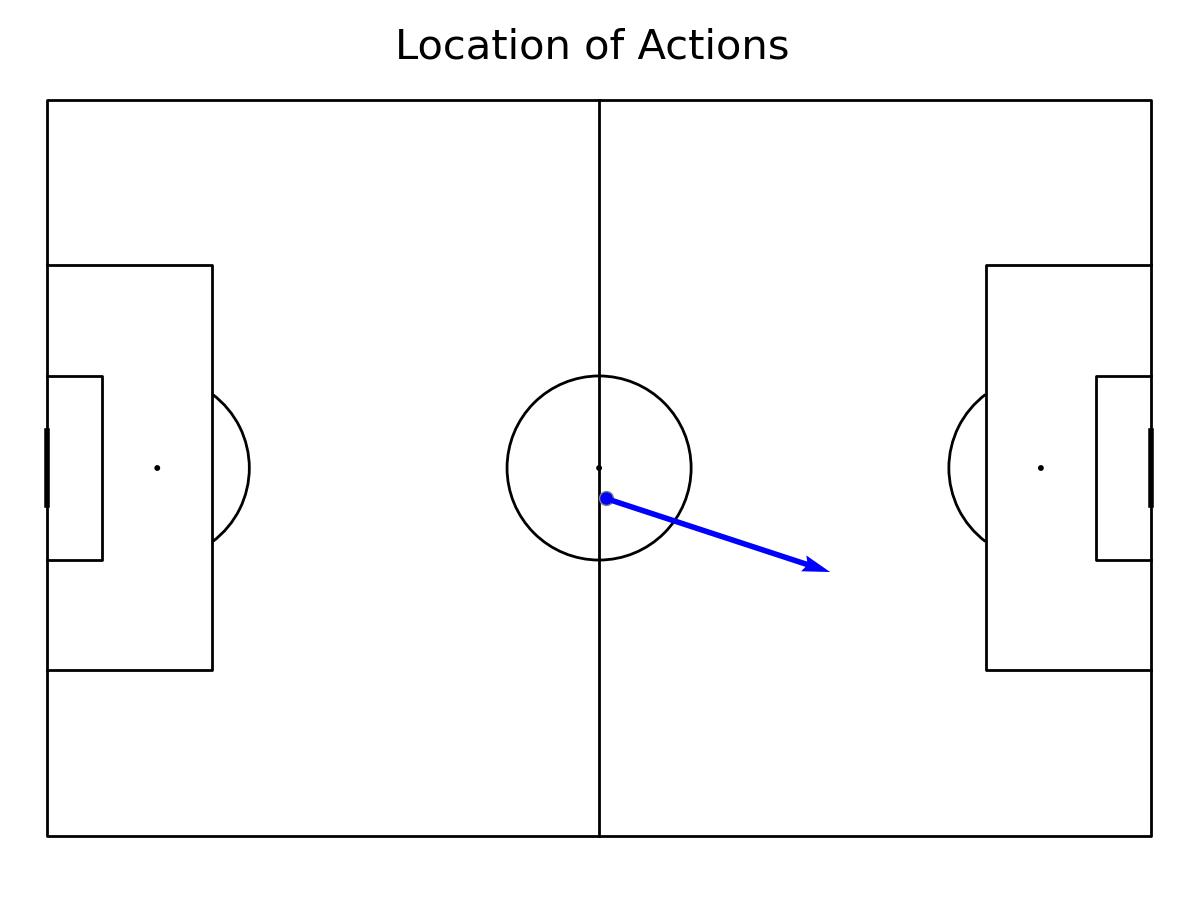

In [12]:
#plot pitch
pitch = Pitch(pitch_type='statsbomb', line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#scatter the location on the pitch
pitch.scatter(filtered_df.x, filtered_df.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"])
#uncomment it to plot arrows
pitch.arrows(filtered_df.x, filtered_df.y, filtered_df.end_x, filtered_df.end_y, color = "blue", ax=ax['pitch'])
#add title
fig.suptitle('Location of Actions ', fontsize = 30)
plt.show()

In [13]:
def default_model_params(time_to_control_veto=3):
    """
    Returns the default parameters for pitch control calculation, modified for a 120x80 pitch.
    
    Parameters:
    -----------
    time_to_control_veto: If the probability that another team or player can get to the ball and control it 
    is less than 10^-time_to_control_veto, ignore that player.
    
    Returns:
    -----------
    params: Dictionary of parameters required for the model.
    """
    pitch_length_ratio = 120 / 106  # Ratio of new pitch length to old
    pitch_area_ratio = (120 * 80) / (106 * 68)  # Ratio of new pitch area to old

    params = {}
    # Player and ball control parameters
    params['max_player_accel'] = 7.0  # Max player acceleration (unchanged)
    
    # Scale max player speed by pitch length ratio
    params['max_player_speed'] = 5.0 * pitch_length_ratio  # Max player speed in m/s (scaled)
    
    params['reaction_time'] = 0.7  # Reaction time in seconds (unchanged)
    
    params['tti_sigma'] = 0.45  # Std. dev. of sigmoid function for time-to-intercept uncertainty (unchanged)
    
    params['kappa_def'] = 1.0  # Defender advantage in ball control probability (unchanged)
    
    # Scale ball control parameters (lambda_att and lambda_def) by pitch area ratio
    params['lambda_att'] = 4.3 * pitch_area_ratio  # Attacking ball control parameter (scaled)
    params['lambda_def'] = 4.3 * params['kappa_def'] * pitch_area_ratio  # Defending ball control parameter (scaled)
    
    # Goalkeeper's advantage also scaled by the same factor
    params['lambda_gk'] = params['lambda_def'] * 3.0  # Goalkeepers' advantage (scaled)
    
    # Scale average ball speed by pitch length ratio
    params['average_ball_speed'] = 15.0 * pitch_length_ratio  # Average ball speed in m/s (scaled)
    
    # Convergence parameters
    params['model_converge_tol'] = 0.01  # Convergence when PPCF > 0.99 at a location (unchanged)
    
    # Time to control cutoff parameters for ball control (unchanged)
    params['time_to_control_att'] = time_to_control_veto * np.log(10) * (np.sqrt(3) * params['tti_sigma'] / np.pi + 1 / params['lambda_att'])
    params['time_to_control_def'] = time_to_control_veto * np.log(10) * (np.sqrt(3) * params['tti_sigma'] / np.pi + 1 / params['lambda_def'])
    
    return params

In [69]:
def initialize_players(event_data, freeze_frame_data, params, pass_team, involved_player_name=None, non_involved_velocities=None):
    attacking_players = []
    defending_players = []

    # Initialize the involved player (e.g., passer or carrier) using event_data velocities if involved_player_name is provided
    if involved_player_name:
        involved_player = Player(
            pid=involved_player_name, 
            team=event_data,  # Ensure event_data contains 'vx' and 'vy'
            teamname=pass_team, 
            params=params, 
            GKid=event_data.get('keeper', False)
        )
        attacking_players.append(involved_player)
        # Print statement for the involved player's velocity
        print(f"Involved player: {involved_player_name}, Position: {involved_player.position}, Velocity: {involved_player.velocity}")

    # Get the non-involved velocities from the dictionary
    event_id = event_data['index']
    non_involved_velocities_for_event = non_involved_velocities.get(event_id, {})

    # Process all players from the freeze frame
    for player_info in freeze_frame_data:
        player_position = tuple(player_info['location'])
        
        # Look up the velocity using player position (or default to 0.0 if missing)
        player_vel = non_involved_velocities_for_event.get(player_position, {'vx': 0.0, 'vy': 0.0, 'speed': 0.0})
        if np.isnan(player_vel['vx']) or np.isnan(player_vel['vy']):
            player_vel = {'vx': 0.0, 'vy': 0.0, 'speed': 0.0}
            print(f"Setting velocity to 0 for player at position {player_info['location']} due to missing velocity data.")

        # Retrieve player velocity
        player_velocity = np.array([player_vel['vx'], player_vel['vy']])
        
        # Assign player to either attacking or defending team
        if player_info['teammate']:
            player_obj = Player(
                pid=None,
                team={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]},
                teamname=pass_team,
                params=params,
                GKid=player_info['keeper']
            )
            attacking_players.append(player_obj)
            print(f"Attacking player: Position: {player_position}, Velocity: {player_velocity}")
        else:
            player_obj = Player(
                pid=None,
                team={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]},
                teamname="Defending",
                params=params,
                GKid=player_info['keeper']
            )
            defending_players.append(player_obj)
            print(f"Defending player: Position: {player_position}, Velocity: {player_velocity}")

    return attacking_players, defending_players

In [64]:
def initialize_players(event_data, freeze_frame_data, params, pass_team, involved_player_name=None, non_involved_velocities=None):
    attacking_players = []
    defending_players = []

    # Initialize the involved player (e.g., passer or carrier) using event_data velocities if involved_player_name is provided
    if involved_player_name:
        involved_player = Player(
            pid=involved_player_name, 
            team=event_data,  # Ensure event_data contains 'vx' and 'vy'
            teamname=pass_team, 
            params=params, 
            GKid=event_data.get('keeper', False)
        )
        attacking_players.append(involved_player)
        # Print statement for the involved player's velocity
        print(f"Involved player: {involved_player_name}, Position: {involved_player.position}, Velocity: {involved_player.velocity}")

    # Get the non-involved velocities from the dictionary
    event_id = event_data['index']
    non_involved_velocities_for_event = non_involved_velocities.get(event_id, {})

    # Process all players from the freeze frame
    for player_info in freeze_frame_data:
        player_position = tuple(player_info['location'])
        
        # Look up the velocity using player position (or default to 0.0 if missing)
        player_vel = non_involved_velocities_for_event.get(player_position, {'vx': 0.0, 'vy': 0.0, 'speed': 0.0})
        if np.isnan(player_vel['vx']) or np.isnan(player_vel['vy']):
            player_vel = {'vx': 0.0, 'vy': 0.0, 'speed': 0.0}
            print(f"Setting velocity to 0 for player at position {player_info['location']} due to missing velocity data.")

        # Retrieve player velocity
        player_velocity = np.array([player_vel['vx'], player_vel['vy']])
        
        # Assign player to either attacking or defending team
        if player_info['teammate']:
            player_obj = Player(
                pid=None,
                team={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]},
                teamname=pass_team,
                params=params,
                GKid=player_info['keeper']
            )
            attacking_players.append(player_obj)
            # Print statement for attacking player's velocity
            print(f"Attacking player: Position: {player_position}, Velocity: {player_velocity}")
        else:
            player_obj = Player(
                pid=None,
                team={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]},
                teamname="Defending",
                params=params,
                GKid=player_info['keeper']
            )
            defending_players.append(player_obj)
            # Print statement for defending player's velocity
            print(f"Defending player: Position: {player_position}, Velocity: {player_velocity}")

    return attacking_players, defending_players


In [56]:
def initialise_players(event_data, freeze_frame_data, params, pass_team, involved_player_name=None):
    attacking_players = []
    defending_players = []

    # Initialize the involved player (e.g., passer or carrier) using event_data velocities if involved_player_name is provided
    if involved_player_name:
        involved_player = Player(
            pid=involved_player_name, 
            team=event_data,  # Ensure event_data contains 'vx' and 'vy'
            teamname=pass_team, 
            params=params, 
            GKid=event_data.get('keeper', False)
        )
        attacking_players.append(involved_player)
        # Print statement for the involved player's velocity
        print(f"Involved player: {involved_player_name}, Position: {involved_player.position}, Velocity: {involved_player.velocity}")

    # Process all players from the freeze frame
    for player_info in freeze_frame_data:
        player_position = np.array(player_info['location'])
        player_velocity = np.array([player_info.get('vx', 0), player_info.get('vy', 0)])  # Get velocity or default to zero

        # Determine if the player is a teammate (attacking) or opponent (defending)
        if player_info['teammate']:
            # Teammate means attacking player
            player_obj = Player(
                pid=None, 
                team={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]},
                teamname=pass_team, 
                params=params, 
                GKid=player_info['keeper']
            )
            attacking_players.append(player_obj)
            # Print statement for attacking player's velocity
            print(f"Attacking player: Position: {player_position}, Velocity: {player_velocity}")
        else:
            # Opponent means defending player
            player_obj = Player(
                pid=None, 
                team={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]},
                teamname="Defending", 
                params=params, 
                GKid=player_info['keeper']
            )
            defending_players.append(player_obj)
            # Print statement for defending player's velocity
            print(f"Defending player: Position: {player_position}, Velocity: {player_velocity}")

    # Debugging output
    #print(f"Attacking players initialized: {[player.position for player in attacking_players]}")
    #print(f"Defending players initialized: {[player.position for player in defending_players]}")

    return attacking_players, defending_players


In [71]:
class Player(object):
    def __init__(self, pid, team, teamname, params, GKid):
        self.id = pid
        self.is_gk = self.id == GKid
        self.teamname = teamname
        self.vmax = params['max_player_speed']  # max player speed in m/s
        self.reaction_time = params['reaction_time']  # reaction time in seconds
        self.tti_sigma = params['tti_sigma']  # standard deviation of sigmoid function
        self.lambda_att = params['lambda_att']  # attacking lambda parameter
        self.lambda_def = params['lambda_gk'] if self.is_gk else params['lambda_def']  # defensive lambda parameter
        
        self.PPCF = 0.0  # Initialize pitch control contribution

        # Get position and velocity
        self.get_position(team)
        self.get_velocity(team)

        # Print statements for debugging
        print(f"Player {pid} position initialized to: {self.position}")
        print(f"Player {pid} velocity initialized to: {self.velocity}")

    def get_position(self, team):
        """
        Retrieves the player's position from the passed 'team' dictionary (event/freeze frame data).
        """
        try:
            self.position = np.array([team['x'], team['y']])  # Use 'x' and 'y' from event data or freeze frame
            self.inframe = not np.any(np.isnan(self.position))  # Check if the player is in the frame (not NaN)
        except KeyError:
            print(f"Error: Missing position data for player {self.id}. Team data: {team}")
            self.position = np.array([np.nan, np.nan])  # Fallback if position data is missing
            self.inframe = False

    def get_velocity(self, team):
        """
        Retrieves the player's velocity from the passed 'team' dictionary (event/freeze frame data).
        If velocity is missing or NaN, defaults to zero (stationary player).
        """
        try:
            vx = team.get('vx', 0.0)  # Default to 0 if missing
            vy = team.get('vy', 0.0)  # Default to 0 if missing
            if np.isnan(vx) or np.isnan(vy):
                vx, vy = 0.0, 0.0  # Handle NaN case
            self.velocity = np.array([vx, vy])
        except KeyError:
            print(f"Error: Missing velocity data for player {self.id}. Team data: {team}")
            self.velocity = np.array([0.0, 0.0])  # Default velocity to zero if not available

    def simple_time_to_intercept(self, r_final):
        """
        Calculate time to intercept a target location (r_final) given current position and velocity.
        
        Assumes the player continues moving at current velocity for 'reaction_time' seconds and
        then moves at full speed (vmax) to the target.
        """
        self.PPCF = 0.0  # Initialize pitch control value (used in pitch control calculations)
        
        # Print velocity and position before computing time to intercept
        #print(f"Player {self.id} - Position: {self.position}, Velocity: {self.velocity}")
        
        # Calculate reaction time position
        r_reaction = self.position + self.velocity * self.reaction_time
        
        # Time to intercept: reaction time + time to cover remaining distance at vmax
        self.time_to_intercept = self.reaction_time + np.linalg.norm(r_final - r_reaction) / self.vmax
        
        print(f"Player {self.id} - Time to intercept: {self.time_to_intercept}")
        
        return self.time_to_intercept
    
    def probability_intercept_ball(self, T):
        """
        Calculate the probability of the player intercepting the ball at time T based on the time-to-intercept.
        
        Uses a sigmoid function for interception probability, based on the time to intercept (Spearman, 2018).
        """
        f = 1 / (1. + np.exp(-np.pi / np.sqrt(3.0) / self.tti_sigma * (T - self.time_to_intercept)))
        return f

In [65]:
class Player(object):
    def __init__(self, pid, team, teamname, params, GKid):
        self.id = pid
        self.is_gk = self.id == GKid
        self.teamname = teamname
        self.vmax = params['max_player_speed']  # max player speed in m/s
        self.reaction_time = params['reaction_time']  # reaction time in seconds
        self.tti_sigma = params['tti_sigma']  # standard deviation of sigmoid function
        self.lambda_att = params['lambda_att']  # attacking lambda parameter
        self.lambda_def = params['lambda_gk'] if self.is_gk else params['lambda_def']  # defensive lambda parameter
        
        self.PPCF = 0.0  # Initialize pitch control contribution

        # Debug print statements for tracking initialization
        #print(f"Initializing player {pid}, teamname: {teamname}")

        # Get position and velocity
        self.get_position(team)
        #print(f"Player {pid} position initialized to: {self.position}")
        
        self.get_velocity(team)
        #print(f"Player {pid} velocity initialized to: {self.velocity}")

    def get_position(self, team):
        """
        Retrieves the player's position from the passed 'team' dictionary (event/freeze frame data).
        """
        try:
            self.position = np.array([team['x'], team['y']])  # Use 'x' and 'y' from event data or freeze frame
            self.inframe = not np.any(np.isnan(self.position))  # Check if the player is in the frame (not NaN)
        except KeyError:
            print(f"Error: Missing position data for player {self.id}. Team data: {team}")
            self.position = np.array([np.nan, np.nan])  # Fallback if position data is missing
            self.inframe = False

    def get_velocity(self, team):
        """
        Retrieves the player's velocity from the passed 'team' dictionary (event/freeze frame data).
        """
        try:
            self.velocity = np.array([team.get('vx', 0), team.get('vy', 0)])  # Use 'vx' and 'vy' from event data, default to zero
        except KeyError:
            print(f"Error: Missing velocity data for player {self.id}. Team data: {team}")
            self.velocity = np.array([0.0, 0.0])  # Default velocity to zero if not available

    def simple_time_to_intercept(self, r_final):
        """
        Calculate time to intercept a target location (r_final) given current position and velocity.
        
        Assumes the player continues moving at current velocity for 'reaction_time' seconds and
        then moves at full speed (vmax) to the target.
        """
        self.PPCF = 0.0  # Initialize pitch control value (used in pitch control calculations)
        
        # Print velocity and position before computing time to intercept
        #print(f"Player {self.id} - Position: {self.position}, Velocity: {self.velocity}")
        
        # Calculate reaction time position
        r_reaction = self.position + self.velocity * self.reaction_time
        
        # Time to intercept: reaction time + time to cover remaining distance at vmax
        self.time_to_intercept = self.reaction_time + np.linalg.norm(r_final - r_reaction) / self.vmax
        
        print(f"Player {self.id} - Time to intercept: {self.time_to_intercept}")
        
        return self.time_to_intercept
    
    def probability_intercept_ball(self, T):
        """
        Calculate the probability of the player intercepting the ball at time T based on the time-to-intercept.
        
        Uses a sigmoid function for interception probability, based on the time to intercept (Spearman, 2018).
        """
        f = 1 / (1. + np.exp(-np.pi / np.sqrt(3.0) / self.tti_sigma * (T - self.time_to_intercept)))
        return f


In [72]:
def generate_pitch_control_for_event(event_id, actions_df, df_match, params, field_dimen=(120., 80.), n_grid_cells_x=50):
    """
    Generate pitch control map for a given event, splitting players into attacking and defending teams.
    """
    try:
        # Extract event details from the DataFrame using the event_id
        event_data = actions_df.loc[actions_df['index'] == event_id].iloc[0]
        
        # Extract freeze_frame_data from the event
        freeze_frame_data = event_data['freeze_frame']
        
        # Get pass_team (example: based on home/away team or other logic in your code)
        pass_team = event_data['team_name']  # Assuming team_name is in event_data
        
        # Get the name of the involved player if relevant (for passes, shots, etc.)
        involved_player_name = event_data.get('player_name', None)
        
        # Initialize players using the initialise_players function
        attacking_players, defending_players = initialise_players(event_data, freeze_frame_data, params, pass_team, involved_player_name)
        
        # Initialize ball start position
        ball_start_pos = np.array([event_data['x'], event_data['y']])
        
        # Initialize grid and pitch control arrays
        PPCFa = np.zeros((n_grid_cells_x, n_grid_cells_x))  # Pitch control for attacking team
        PPCFd = np.zeros((n_grid_cells_x, n_grid_cells_x))  # Pitch control for defending team
        xgrid = np.linspace(0, field_dimen[0], n_grid_cells_x)
        ygrid = np.linspace(0, field_dimen[1], n_grid_cells_x)
        
        # Calculate pitch control at each grid point
        for i, y in enumerate(ygrid):
            for j, x in enumerate(xgrid):
                target_position = np.array([x, y])
                
                # Print the target position before calculating pitch control
                print(f"Target position: {target_position}")
                
                # Calculate pitch control for this point on the pitch
                P_att, P_def = calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params)
                
                print(f"Pitch control at {target_position}: P_att = {P_att}, P_def = {P_def}")
                
                # Assign pitch control values to PPCFa and PPCFd arrays
                PPCFa[i, j] = P_att
                PPCFd[i, j] = P_def
        
        # Return the calculated arrays and grids
        return PPCFa, PPCFd, xgrid, ygrid

    except Exception as e:
        print(f"Error in pitch control calculation: {e}")
        return None  # In case of error, return None

In [73]:
def calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params):
    """
    Calculate the pitch control for a specific target position.
    """
    #print("Target position:", target_position)
    
    # Check the contents of attacking and defending players lists
    #print("Attacking players (type check):", [type(player) for player in attacking_players])
    #print("Defending players (type check):", [type(player) for player in defending_players])

    # Print attacking and defending player positions, assuming each is a Player object
    #try:
        #print("Attacking player positions:", [player.position for player in attacking_players])
        #print("Defending player positions:", [player.position for player in defending_players])
    #except AttributeError as e:
        #print(f"Error accessing player positions: {e}")
        #print("Inspecting players:")
        #print("Attacking players:", attacking_players)
        #print("Defending players:", defending_players)
        #raise e

    # Your pitch control calculations go here
    
# Calculate ball travel time from start position to target position
    if ball_start_pos is None or any(np.isnan(ball_start_pos)):
        ball_travel_time = 0.0
    else:
        ball_travel_time = np.linalg.norm(target_position - ball_start_pos) / params['average_ball_speed']

    # Get arrival time of 'nearest' attacking and defending players
    tau_min_att = np.nanmin([p.simple_time_to_intercept(target_position) for p in attacking_players])
    tau_min_def = np.nanmin([p.simple_time_to_intercept(target_position) for p in defending_players])

    print(f"tau_min_att: {tau_min_att}, tau_min_def: {tau_min_def}, ball_travel_time: {ball_travel_time}")

    # Calculate pitch control directly based on arrival times
    if tau_min_att - max(ball_travel_time, tau_min_def) >= params['time_to_control_def']:
        return 0., 1.
    elif tau_min_def - max(ball_travel_time, tau_min_att) >= params['time_to_control_att']:
        return 1., 0.
    else:
        P_att = 1 / (1 + np.exp(-(tau_min_att - tau_min_def)))
        P_def = 1 - P_att
        return P_att, P_def

In [74]:
# Define model parameters using the default_model_params function
params = default_model_params()

# Assuming event_id, actions_df, df_match, and params are already defined
event_id = filtered_df.iloc[0]['index']  # Use event_id from your filtered DataFrame

# Call the pitch control function with the filtered event and parameters
PPCFa, PPCFd, xgrid, ygrid = generate_pitch_control_for_event(
    event_id=event_id,
    actions_df=actions_df,    # Full DataFrame of events
    df_match=df_match,        # DataFrame containing home and away team names
    params=params             # Updated model parameters with event duration
)

# Now the print statement inside the function will display the ball travel time

Player John Stones position initialized to: [60.7 43.3]
Player John Stones velocity initialized to: [-0.3224342  -0.46332305]
Involved player: John Stones, Position: [60.7 43.3], Velocity: [-0.3224342  -0.46332305]
Player None position initialized to: [54.89231007 35.39025562]
Player None velocity initialized to: [0 0]
Attacking player: Position: [54.89231007 35.39025562], Velocity: [0 0]
Player None position initialized to: [60.70000076 43.29999924]
Player None velocity initialized to: [0 0]
Attacking player: Position: [60.70000076 43.29999924], Velocity: [0 0]
Player None position initialized to: [61.03114404 35.57186507]
Player None velocity initialized to: [0 0]
Defending player: Position: [61.03114404 35.57186507], Velocity: [0 0]
Player None position initialized to: [62.59455857 26.66789162]
Player None velocity initialized to: [0 0]
Attacking player: Position: [62.59455857 26.66789162], Velocity: [0 0]
Player None position initialized to: [66.06149174 44.87146545]
Player None ve

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [46]:
# Calculate velocities first
actions_df_with_velocities, non_involved_velocities = calc_event_velocities(actions_df)

# Define model parameters using the default_model_params function
params = default_model_params()  # Make sure params is initialized before calling the function

# Assuming event_id, actions_df, df_match, and params are already defined
event_id = filtered_df.iloc[0]['index']  # Use event_id from your filtered DataFrame

# Then generate pitch control for the event
PPCFa, PPCFd, xgrid, ygrid = generate_pitch_control_for_event(
    event_id=event_id,
    actions_df=actions_df_with_velocities,  # Use the DataFrame with calculated velocities
    df_match=df_match,
    params=params,
    non_involved_velocities=non_involved_velocities  # Pass the dictionary with non-involved player velocities
)

Initializing player John Stones, teamname: England
Player John Stones position initialized to: [60.7 43.3]
Player John Stones velocity initialized to: [-0.3224342  -0.46332305]
Involved player: John Stones, Position: [60.7 43.3], Velocity: [-0.3224342  -0.46332305]
Attacking players initialized: [array([60.7, 43.3])]
Defending players initialized: []
No defending players found. Setting default values for pitch control.


In [73]:
print(f"Attacking player positions: {[p.position for p in attacking_players]}")
print(f"Defending player positions: {[p.position for p in defending_players]}")

Attacking player positions: [array([24.9968576 , 42.22377696]), array([31.8117641 , 24.98294316]), array([32.1562795 , 60.97362383]), array([36.12144216, 75.81170393]), array([38.18386286, 50.3029973 ]), array([40.90000153, 57.79999924]), array([44.48778526, 57.30351528]), array([46.00215836, 34.67878263]), array([49.46224645, 65.9609143 ]), array([57.14312429, 73.83933316]), array([58.46455678, 45.65747578]), array([58.4838313 , 57.79778622]), array([59.93804981, 43.22024148]), array([61.37408414, 74.00673606]), array([63.91930151, 38.50455911]), array([65.62569991, 54.07071951]), array([66.4328335 , 19.35420038]), array([68.38996828, 67.68490561]), array([68.40575621, 15.32608351]), array([68.68790142, 74.37571322])]
Defending player positions: [array([24.9968576 , 42.22377696]), array([31.8117641 , 24.98294316]), array([32.1562795 , 60.97362383]), array([36.12144216, 75.81170393]), array([38.18386286, 50.3029973 ]), array([40.90000153, 57.79999924]), array([44.48778526, 57.30351528]

NameError: name 'xgrid' is not defined

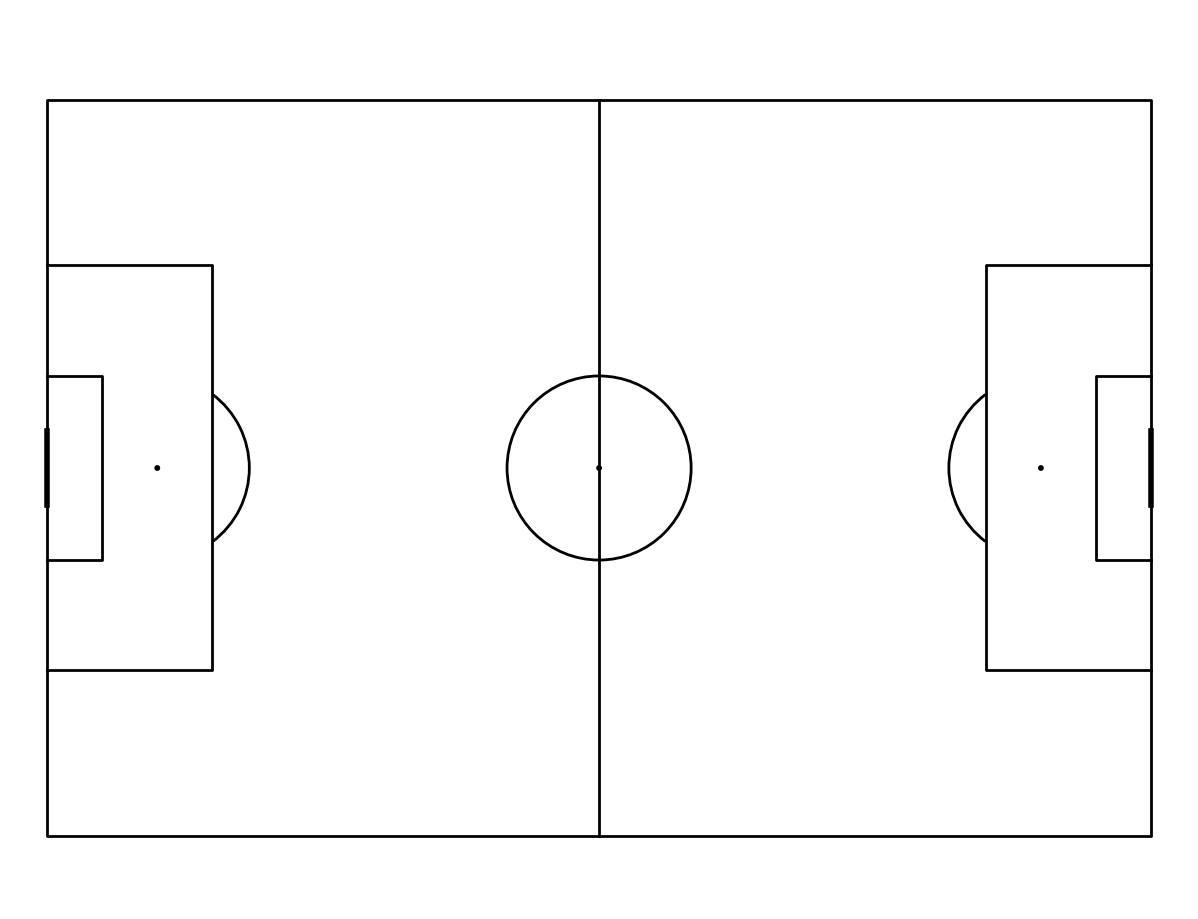

In [33]:
# Create the pitch (120x80 is the StatsBomb default)
pitch = Pitch(pitch_type='statsbomb', line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot the pitch control surface (PPCFa for attacking team pitch control)
pc = ax['pitch'].pcolormesh(xgrid, ygrid, PPCFa, cmap='coolwarm', shading='auto', alpha=0.6)

# Scatter the involved event (e.g., pass, shot)
pitch.scatter(filtered_df.x, filtered_df.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"])

# Plot arrows representing the pass/shot direction
pitch.arrows(filtered_df.x, filtered_df.y, filtered_df.end_x, filtered_df.end_y, color="blue", ax=ax['pitch'])

# Now plot the player positions from the freeze frame
for _, event in filtered_df.iterrows():
    freeze_frame_data = event['freeze_frame']  # Access the freeze frame for each event
    for player in freeze_frame_data:
        location = player['location']
        color = 'red' if player['teammate'] else 'green'  # Differentiate between teammates and opponents
        pitch.scatter(location[0], location[1], s=100, color=color, edgecolors='black', linewidth=1, alpha=1, ax=ax['pitch'])
        
        # Optionally: Add arrows for velocity if available in the freeze frame
        if 'vx' in player and 'vy' in player:
            pitch.arrows(location[0], location[1], location[0] + player['vx'], location[1] + player['vy'], color=color, ax=ax['pitch'])

# Add title
fig.suptitle('Pitch Control and Player Positions for Event', fontsize=30)

# Display the pitch with heatmap and player positions
plt.show()

NameError: name 'PPCF' is not defined

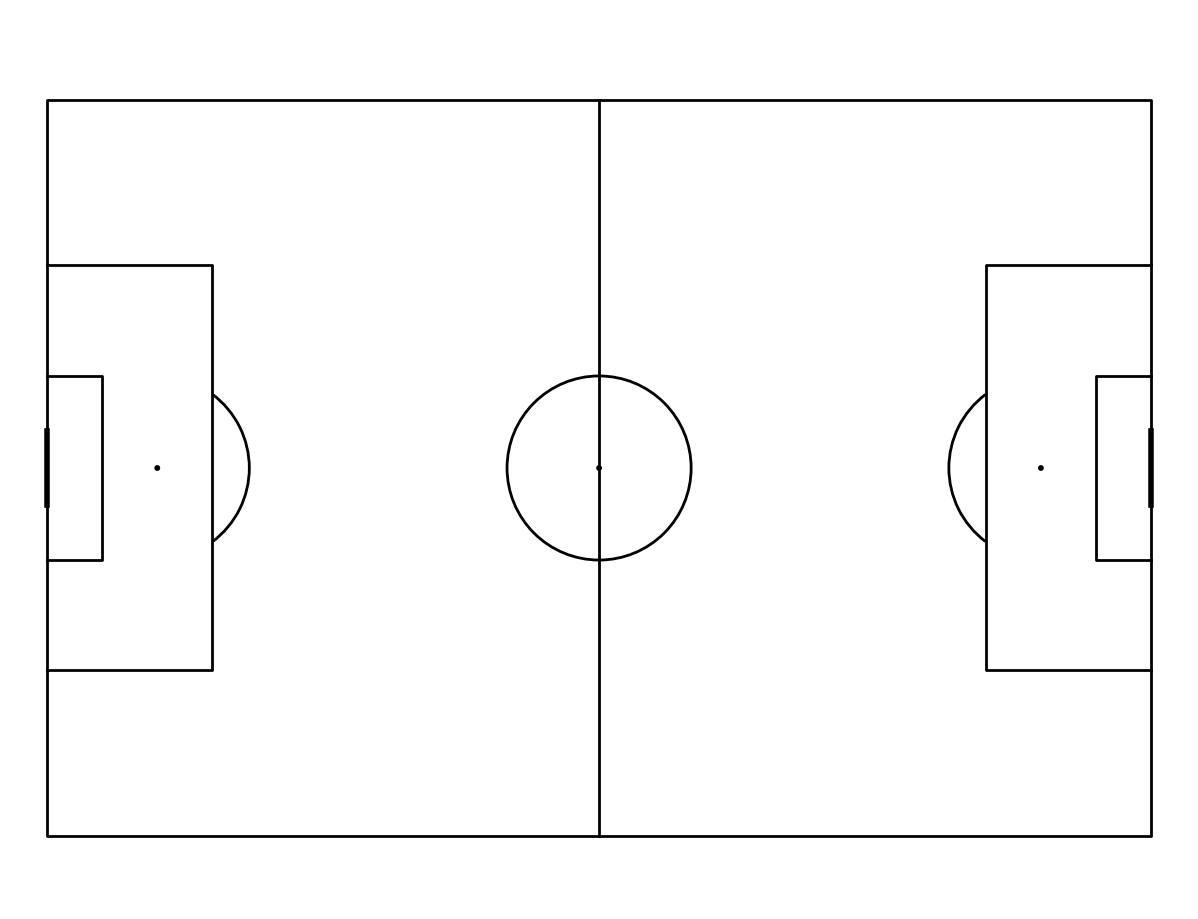

In [33]:
# Create the pitch (120x80 is the StatsBomb default)
pitch = Pitch(pitch_type='statsbomb', line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Plot the pitch control surface (PPCF)
pc = ax['pitch'].pcolormesh(xgrid, ygrid, PPCF, cmap='coolwarm', shading='auto', alpha=0.6)

# Scatter the involved event (e.g., pass, shot)
pitch.scatter(filtered_df.x, filtered_df.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"])

# Plot arrows representing the pass/shot direction
pitch.arrows(filtered_df.x, filtered_df.y, filtered_df.end_x, filtered_df.end_y, color="blue", ax=ax['pitch'])

# Now plot the player positions from the freeze frame
for _, event in filtered_df.iterrows():
    freeze_frame_data = event['freeze_frame']  # Access the freeze frame for each event
    for player in freeze_frame_data:
        location = player['location']
        color = 'red' if player['teammate'] else 'green'  # Differentiate between teammates and opponents
        pitch.scatter(location[0], location[1], s=100, color=color, edgecolors='black', linewidth=1, alpha=1, ax=ax['pitch'])
        
        # Optionally: Add arrows for velocity if available in the freeze frame
        if 'vx' in player and 'vy' in player:
            pitch.arrows(location[0], location[1], location[0] + player['vx'], location[1] + player['vy'], color=color, ax=ax['pitch'])

# Add title
fig.suptitle('Pitch Control and Player Positions for Event', fontsize=30)

# Display the pitch with heatmap and player positions
plt.show()

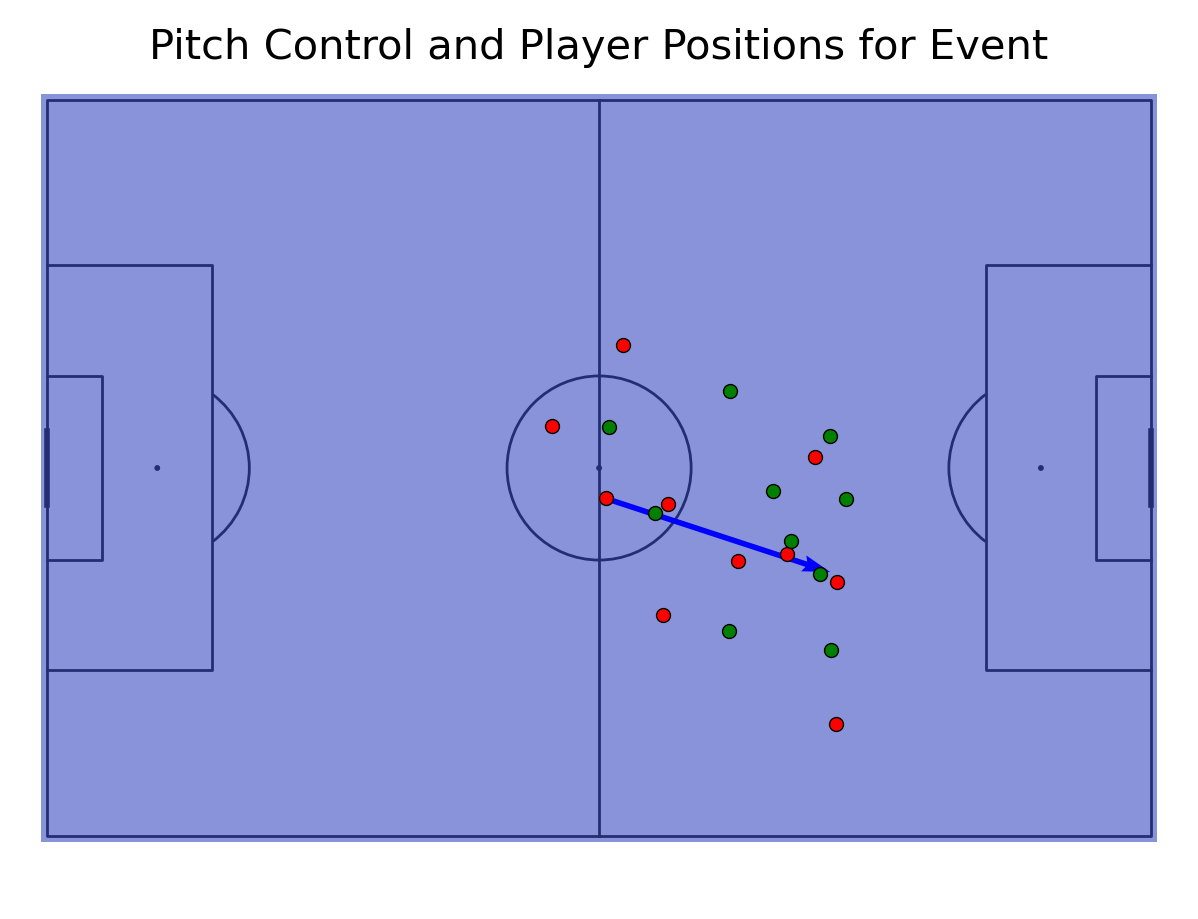

In [28]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Create the pitch with the correct StatsBomb dimensions
pitch = Pitch(pitch_type='statsbomb', pitch_length=120, pitch_width=80, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

# Adjust the xgrid and ygrid to match the full pitch dimensions
xgrid_full = np.linspace(0, 120, PPCF.shape[1])  # Full pitch from 0 to 120 in the x-direction
ygrid_full = np.linspace(0, 80, PPCF.shape[0])   # Full pitch from 0 to 80 in the y-direction

# Plot the pitch control surface (PPCF)
pc = ax['pitch'].pcolormesh(xgrid_full, ygrid_full, PPCF, cmap='coolwarm', shading='auto', alpha=0.6)

# Scatter the involved event (e.g., pass, shot)
pitch.scatter(filtered_df.x, filtered_df.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"])

# Plot arrows representing the pass/shot direction
pitch.arrows(filtered_df.x, filtered_df.y, filtered_df.end_x, filtered_df.end_y, color="blue", ax=ax['pitch'])

# Now plot the player positions from the freeze frame
for _, event in filtered_df.iterrows():
    freeze_frame_data = event['freeze_frame']  # Access the freeze frame for each event
    for player in freeze_frame_data:
        location = player['location']
        color = 'red' if player['teammate'] else 'green'  # Differentiate between teammates and opponents
        pitch.scatter(location[0], location[1], s=100, color=color, edgecolors='black', linewidth=1, alpha=1, ax=ax['pitch'])
        
        # Optionally: Add arrows for velocity if available in the freeze frame
        if 'vx' in player and 'vy' in player:
            pitch.arrows(location[0], location[1], location[0] + player['vx'], location[1] + player['vy'], color=color, ax=ax['pitch'])

# Add title
fig.suptitle('Pitch Control and Player Positions for Event', fontsize=30)

# Display the pitch with heatmap and player positions
plt.show()

In [18]:
# Assuming event_id, actions_df, df_match, and params are already defined

# Get a specific event to analyze (e.g., from filtered data)
event_id = filtered_df.iloc[0]['index']  # Use event_id from your filtered DataFrame

# Call the pitch control function with the filtered event and parameters
PPCF, xgrid, ygrid = generate_pitch_control_for_event(
    event_id=event_id,
    actions_df=actions_df,    # Full DataFrame of events
    df_match=df_match,        # DataFrame containing home and away team names
    params=params             # Updated model parameters with event duration
)

# Now the print statement inside the function will display the ball travel time

NameError: name 'params' is not defined

In [ ]:
def calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params):
    """ calculate_pitch_control_at_target
    
    Calculates the pitch control probability for the attacking and defending teams at a specified target position on the ball.
    
    Parameters
    -----------
        target_position: size 2 numpy array containing the (x,y) position of the position on the field to evaluate pitch control
        attacking_players: list of 'player' objects (see player class above) for the players on the attacking team (team in possession)
        defending_players: list of 'player' objects (see player class above) for the players on the defending team
        ball_start_pos: Current position of the ball (start position for a pass). If set to NaN, function will assume that the ball is already at the target position.
        params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
        
    Returrns
    -----------
        PPCFatt: Pitch control probability for the attacking team
        PPCFdef: Pitch control probability for the defending team ( 1-PPCFatt-PPCFdef <  params['model_converge_tol'] )

    """
    # calculate ball travel time from start position to end position.
    if ball_start_pos is None or any(np.isnan(ball_start_pos)): # assume that ball is already at location
        ball_travel_time = 0.0 
    else:
        # ball travel time is distance to target position from current ball position divided assumed average ball speed
        ball_travel_time = np.linalg.norm( target_position - ball_start_pos )/params['average_ball_speed']
    
    # first get arrival time of 'nearest' attacking player (nearest also dependent on current velocity)
    tau_min_att = np.nanmin( [p.simple_time_to_intercept(target_position) for p in attacking_players] )
    tau_min_def = np.nanmin( [p.simple_time_to_intercept(target_position ) for p in defending_players] )
    
    # check whether we actually need to solve equation 3
    if tau_min_att-max(ball_travel_time,tau_min_def) >= params['time_to_control_def']:
        # if defending team can arrive significantly before attacking team, no need to solve pitch control model
        return 0., 1.
    elif tau_min_def-max(ball_travel_time,tau_min_att) >= params['time_to_control_att']:
        # if attacking team can arrive significantly before defending team, no need to solve pitch control model
        return 1., 0.
    else: 
        # solve pitch control model by integrating equation 3 in Spearman et al.
        # first remove any player that is far (in time) from the target location
        attacking_players = [p for p in attacking_players if p.time_to_intercept-tau_min_att < params['time_to_control_att'] ]
        defending_players = [p for p in defending_players if p.time_to_intercept-tau_min_def < params['time_to_control_def'] ]
        # set up integration arrays
        dT_array = np.arange(ball_travel_time-params['int_dt'],ball_travel_time+params['max_int_time'],params['int_dt']) 
        PPCFatt = np.zeros_like( dT_array )
        PPCFdef = np.zeros_like( dT_array )
        # integration equation 3 of Spearman 2018 until convergence or tolerance limit hit (see 'params')
        ptot = 0.0
        i = 1
        while 1-ptot>params['model_converge_tol'] and i<dT_array.size: 
            T = dT_array[i]
            for player in attacking_players:
                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1-PPCFatt[i-1]-PPCFdef[i-1])*player.probability_intercept_ball( T ) * player.lambda_att
                # make sure it's greater than zero
                assert dPPCFdT>=0, 'Invalid attacking player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT*params['int_dt'] # total contribution from individual player
                PPCFatt[i] += player.PPCF # add to sum over players in the attacking team (remembering array element is zero at the start of each integration iteration)
            for player in defending_players:
                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1-PPCFatt[i-1]-PPCFdef[i-1])*player.probability_intercept_ball( T ) * player.lambda_def
                # make sure it's greater than zero
                assert dPPCFdT>=0, 'Invalid defending player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT*params['int_dt'] # total contribution from individual player
                PPCFdef[i] += player.PPCF # add to sum over players in the defending team
            ptot = PPCFdef[i]+PPCFatt[i] # total pitch control probability 
            i += 1
        if i>=dT_array.size:
            print("Integration failed to converge: %1.3f" % (ptot) )
        return PPCFatt[i-1], PPCFdef[i-1]

In [69]:
# Ensure you have filtered the event
event_id = filtered_df.iloc[0]['index']  # Get the event index from the filtered data

# Call the pitch control function with the filtered event and updated parameters
PPCF, xgrid, ygrid = generate_pitch_control_for_event(
    event_id=event_id,
    actions_df=actions_df,    # Full DataFrame of events
    df_match=df_match,        # DataFrame containing home and away team names
    params=params             # Updated model parameters with event duration
)

# Display the PPCF (Pitch Control for the attacking team)
print(PPCF)

Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration 

AssertionError: Checksum failed: 0.709

In [70]:
# Ensure probabilities sum to 1 (within tolerance)
checksum = np.sum(PPCFa + PPCFd) / float(n_grid_cells_y * n_grid_cells_x)
print(f"Checksum: {checksum}")  # Temporary print statement for debugging
# assert 1 - checksum < params['model_converge_tol'], f"Checksum failed: {1-checksum:.3f}"  # Comment out for now

NameError: name 'PPCFa' is not defined

In [10]:
class Player:
    def __init__(self, pid, teamname, params, GKid, event_data, involved=False):
        """
        Initialize a Player object.

        Parameters:
        -----------
        pid : str
            Player's ID or name.
        teamname : bool
            True if the player is on the attacking team, False otherwise.
        params : dict
            Model parameters (e.g., lambda values, max speed).
        GKid : bool
            True if the player is a goalkeeper, False otherwise.
        event_data : dict
            Dictionary containing the player's position ('x', 'y') and velocity ('vx', 'vy').
        involved : bool
            Whether the player is directly involved in the play (e.g., passer, ball recipient).
        """
        self.pid = pid  # Player's ID or name
        self.teamname = teamname  # True if the player is on the attacking team
        self.params = params  # Model parameters
        self.GKid = GKid  # True if player is a goalkeeper
        self.position = np.array([event_data['x'], event_data['y']])  # Player's current position
        self.velocity = np.array([event_data['vx'], event_data['vy']])  # Player's current velocity
        self.lambda_att = params['lambda_att'] if teamname else 0  # Attacking team's lambda value
        self.lambda_def = params['lambda_def'] if not teamname else 0  # Defending team's lambda value
        self.involved = involved  # True if this player is directly involved in the play

In [11]:
def calc_event_velocities(actions_df, maxspeed=13.8, position_tolerance=30, formation_tolerance=20):
    """
    Calculate player velocities for Pass, Carry, Ball Receipt, and Shot events based on player positions,
    including non-involved players using freeze frame data from the current and next events.
    Incorporates team movement and formation considerations.
    
    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing event data with player positions and freeze frame data.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.
    position_tolerance : float
        Tolerance distance to match pass recipient's position with the end_x, end_y of the pass.
    formation_tolerance : float
        Tolerance for maintaining the team's formation when tracking player movements.
    
    Returns:
    --------
    actions_df : DataFrame
        DataFrame with additional velocity columns (vx, vy, speed) for involved players.
    non_involved_velocities : dict
        Dictionary storing velocities of non-involved players for each event.
    """
    
    # Ensure the DataFrame has the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration', 'type_name', 'pass_recipient_name', 'freeze_frame']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Initialize new velocity columns for involved players
    actions_df['vx'], actions_df['vy'], actions_df['speed'] = np.nan, np.nan, np.nan
    
    # Dictionary to store non-involved players' velocities
    non_involved_velocities = {}
    
    # Calculate velocities
    for idx, row in actions_df.iterrows():
        involved_velocity_calculated = False  # Track if velocity for the involved player has been calculated
        event_id = row['index']  # Event ID to track non-involved player velocities
        
        # Store non-involved player velocities for this event
        non_involved_velocities[event_id] = []
        
        # For Carry events
        if row['type_name'] == 'Carry':
            # Calculate velocity for the player carrying the ball
            delta_x = row['end_x'] - row['x']
            delta_y = row['end_y'] - row['y']
            duration = row['duration']
            involved_velocity_calculated = True

        # For Pass events
        elif row['type_name'] == 'Pass':
            # Handle Pass events: calculate velocity for the pass recipient
            freeze_frame_data = row['freeze_frame']
            recipient_position = None
            closest_distance = float('inf')
            
            # Find the pass recipient's position based on proximity to the pass end location
            for player in freeze_frame_data:
                if player['teammate'] and not player['actor']:  # Teammate and not the passer
                    player_position = np.array(player['location'])
                    end_position = np.array([row['end_x'], row['end_y']])
                    distance_to_end = np.linalg.norm(player_position - end_position)
                    
                    # Check if the player is the closest within the tolerance range
                    if distance_to_end <= position_tolerance and distance_to_end < closest_distance:
                        recipient_position = player_position
                        closest_distance = distance_to_end
            
            if recipient_position is not None:
                # Calculate the velocity of the recipient
                delta_x = row['end_x'] - recipient_position[0]
                delta_y = row['end_y'] - recipient_position[1]
                duration = row['duration']
                involved_velocity_calculated = True

        # If involved player's velocity was calculated, store it
        if involved_velocity_calculated and duration > 0:
            vx = delta_x / duration
            vy = delta_y / duration
            speed = np.sqrt(vx**2 + vy**2)
            
            # Filter unrealistic speeds
            if speed > maxspeed:
                vx, vy, speed = np.nan, np.nan, np.nan
            
            # Store involved player's velocity
            actions_df.at[idx, 'vx'] = vx
            actions_df.at[idx, 'vy'] = vy
            actions_df.at[idx, 'speed'] = speed

        # Calculate velocities for non-involved players
        freeze_frame_data = row['freeze_frame']  # Current event's freeze frame
        duration = row['duration']  # Duration of the current event
        
        # Get the next event in the same period
        next_event = actions_df[(actions_df['match_id'] == row['match_id']) &
                                (actions_df['period'] == row['period']) &
                                (actions_df['index'] > row['index'])].head(1)
        
        if next_event.empty:
            continue
        
        next_freeze_frame_data = next_event.iloc[0]['freeze_frame']  # Next event's freeze frame

        # Separate teammates from freeze frame
        current_attacking_positions = np.array([np.array(p['location']) for p in freeze_frame_data if p['teammate']])
        next_attacking_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if p['teammate']])
        current_defending_positions = np.array([np.array(p['location']) for p in freeze_frame_data if not p['teammate']])
        next_defending_positions = np.array([np.array(p['location']) for p in next_freeze_frame_data if not p['teammate']])

        # Check if attacking positions are non-empty
        attacking_pairs = []
        if len(current_attacking_positions) > 0 and len(next_attacking_positions) > 0:
            for i, current_position in enumerate(current_attacking_positions):
                # Find the closest next_position within the tolerance
                distances = np.linalg.norm(next_attacking_positions - current_position, axis=1)
                min_distance_idx = np.argmin(distances)
                if distances[min_distance_idx] <= formation_tolerance:
                    attacking_pairs.append((current_position, next_attacking_positions[min_distance_idx]))

        # Check if defending positions are non-empty
        defending_pairs = []
        if len(current_defending_positions) > 0 and len(next_defending_positions) > 0:
            for i, current_position in enumerate(current_defending_positions):
                # Find the closest next_position within the tolerance
                distances = np.linalg.norm(next_defending_positions - current_position, axis=1)
                min_distance_idx = np.argmin(distances)
                if distances[min_distance_idx] <= formation_tolerance:
                    defending_pairs.append((current_position, next_defending_positions[min_distance_idx]))

        # Calculate team shift vector for attackers and defenders based on valid pairs
        if len(attacking_pairs) > 0:
            attacking_shift_vector = np.mean([pair[1] - pair[0] for pair in attacking_pairs], axis=0)
        else:
            attacking_shift_vector = np.array([0, 0])

        if len(defending_pairs) > 0:
            defending_shift_vector = np.mean([pair[1] - pair[0] for pair in defending_pairs], axis=0)
        else:
            defending_shift_vector = np.array([0, 0])

        # Track velocities for non-involved players
        for player in freeze_frame_data:
            if not player['actor']:  # Skip the player involved in the action
                player_position = np.array(player['location'])
                teammate = player['teammate']
                
                # Apply the shift vector for teammates and non-teammates
                if teammate:
                    shift_vector = attacking_shift_vector
                else:
                    shift_vector = defending_shift_vector
                
                # Estimate new position based on team shift
                estimated_next_position = player_position + shift_vector
                delta_pos = estimated_next_position - player_position
                vx = delta_pos[0] / duration if duration > 0 else 0
                vy = delta_pos[1] / duration if duration > 0 else 0
                speed = np.sqrt(vx**2 + vy**2)
                
                # Filter unrealistic speeds
                if speed > maxspeed:
                    vx, vy, speed = np.nan, np.nan, np.nan
                
                # Store these velocities for non-involved players
                non_involved_velocities[event_id].append({
                    'player_position': player_position.tolist(),
                    'vx': vx,
                    'vy': vy,
                    'speed': speed,
                    'teammate': teammate
                })

    return actions_df, non_involved_velocities

# Assuming `actions_df` is the DataFrame with Pass, Carry, Ball Receipt, and Shot events
actions_df_with_velocities, non_involved_velocities = calc_event_velocities(actions_df)

# Display the involved players' velocities
print(actions_df_with_velocities[['type_name', 'vx', 'vy', 'speed']])

# Display velocities of non-involved players for the first event
print(non_involved_velocities[next(iter(non_involved_velocities))])

           type_name        vx        vy     speed
0               Pass  1.222920 -2.652692  2.921012
1       Ball Receipt       NaN       NaN       NaN
2              Carry  1.892276 -4.187165  4.594895
3               Pass -0.322434 -0.463323  0.564475
4       Ball Receipt       NaN       NaN       NaN
...              ...       ...       ...       ...
114861          Pass  5.831868 -4.110814  7.135087
114862  Ball Receipt       NaN       NaN       NaN
114863          Pass  2.163359  0.909746  2.346862
114864  Ball Receipt       NaN       NaN       NaN
114865         Carry  2.271101  3.179542  3.907351

[114866 rows x 4 columns]
[{'player_position': [41.29842580722467, 44.700408154511074], 'vx': 1.072054179204382, 'vy': 2.0981141897938667, 'speed': 2.3561373721759, 'teammate': True}, {'player_position': [42.69337667350762, 35.53530103759538], 'vx': 1.072054179204382, 'vy': 2.0981141897938667, 'speed': 2.3561373721759, 'teammate': True}, {'player_position': [45.497936177694946, 25.779

In [ ]:
def calculate_time_to_intercept(player, target_position, params, involved):
    """
    Calculate the time to intercept a target location for a player based on their position, velocity, reaction time, and max speed.

    Parameters:
    -----------
    player : Player object
        The player for whom to calculate the time to intercept.
    target_position : np.array
        Target position to intercept (x, y).
    params : dict
        Dictionary of model parameters (e.g., reaction_time, max_player_speed).
    involved : bool
        Whether the player is directly involved in the event.

    Returns:
    --------
    tti : float
        Time to intercept the target in seconds.
    """
    reaction_time = params['reaction_time']
    max_speed = params['max_player_speed']
    
    # For involved players
    if involved:
        # Use the player's position and velocity directly
        player_position = player.position
        player_velocity = player.velocity
    else:
        # For non-involved players, assume they move based on a shift calculated earlier
        player_position = player.position
        player_velocity = player.velocity  # Should already have been calculated

    # Step 1: Calculate player's position after reaction time
    r_reaction = player_position + player_velocity * reaction_time

    # Step 2: Calculate the remaining distance to the target after reaction time
    remaining_distance = np.linalg.norm(target_position - r_reaction)

    # Step 3: Calculate time to intercept as reaction time + time to cover remaining distance at max speed
    if max_speed > 0:
        time_to_intercept = reaction_time + (remaining_distance / max_speed)
    else:
        time_to_intercept = float('inf')  # Infinite time if player cannot move

    return time_to_intercept


In [13]:
def calculate_time_to_intercept(player, target_position, params, involved):
    """
    Calculate the time to intercept a target location for a player based on their position, velocity, reaction time, and max speed.

    Parameters:
    -----------
    player : Player object
        The player for whom to calculate the time to intercept.
    target_position : np.array
        Target position to intercept (x, y).
    params : dict
        Dictionary of model parameters (e.g., reaction_time, max_player_speed).
    involved : bool
        Whether the player is directly involved in the event.

    Returns:
    --------
    tti : float
        Time to intercept the target in seconds.
    """
    reaction_time = params['reaction_time']
    max_speed = params['max_player_speed']
    
    # For involved players
    if involved:
        # Use the player's position and velocity directly
        player_position = player.position
        player_velocity = player.velocity
    else:
        # For non-involved players in freeze_frame data, they are assumed to move based on a shift
        player_position = player.position
        player_velocity = player.velocity  # Should already have been calculated during velocity calculation

    # Calculate the distance between the player and the target
    distance_to_target = np.linalg.norm(target_position - player_position)

    # Calculate the distance covered during the reaction time (with current velocity)
    reaction_distance = np.linalg.norm(player_velocity) * reaction_time

    # Remaining distance to cover after reaction time
    remaining_distance = max(0, distance_to_target - reaction_distance)

    # Time to intercept is reaction time + time to cover the remaining distance at max speed
    if max_speed > 0:
        time_to_intercept = reaction_time + (remaining_distance / max_speed)
    else:
        time_to_intercept = float('inf')  # Set to infinity if max speed is zero (player cannot intercept)

    return time_to_intercept

In [14]:
def calculate_interception_probability(T, TTI, params):
    """
    Calculate the probability of a player intercepting the ball at time T using a sigmoid function.
    
    Parameters:
    -----------
    T : float
        Time at which to evaluate the interception probability.
    TTI : float
        Time to intercept the ball (TTI) for a player.
    params : dict
        Dictionary of model parameters (including tti_sigma for uncertainty in TTI).
    
    Returns:
    --------
    P_intercept : float
        Probability of intercepting the ball at time T.
    """
    sigma_tti = params['tti_sigma']
    
    # Sigmoid function to calculate the probability of interception
    P_intercept = 1 / (1 + np.exp(-np.pi * (T - TTI) / (np.sqrt(3) * sigma_tti)))
    
    return P_intercept

In [16]:
def calculate_pitch_control(grid_locations, attacking_players, defending_players, ball_start_pos, params):
    """
    Calculate the pitch control probability for the attacking and defending teams at each grid location.
    
    Parameters:
    -----------
    grid_locations : np.array
        2D array of grid locations on the pitch.
    attacking_players : list
        List of attacking players with their positions, velocities, and other attributes.
    defending_players : list
        List of defending players with their positions, velocities, and other attributes.
    ball_start_pos : np.array
        Starting position of the ball.
    params : dict
        Dictionary of model parameters.
    
    Returns:
    --------
    PPCFatt : np.array
        Pitch control probability for the attacking team at each grid location.
    PPCFdef : np.array
        Pitch control probability for the defending team at each grid location.
    """
    # Initialize pitch control grids for attacking and defending teams
    PPCFatt = np.zeros_like(grid_locations[:, :, 0])
    PPCFdef = np.zeros_like(grid_locations[:, :, 0])
    
    # Iterate over each grid location
    for i in range(grid_locations.shape[0]):
        for j in range(grid_locations.shape[1]):
            target_position = grid_locations[i, j, :]
            
            # Initialize probabilities for this grid location
            P_att_sum, P_def_sum = 0.0, 0.0
            
            # Calculate probability of interception for each attacking player
            for player in attacking_players:
                TTI = calculate_time_to_intercept(player, target_position, params, involved=player['involved'])
                P_intercept = calculate_interception_probability(params['int_dt'], TTI, params)
                P_att_sum += P_intercept * player['lambda_att']
            
            # Calculate probability of interception for each defending player
            for player in defending_players:
                TTI = calculate_time_to_intercept(player, target_position, params, involved=player['involved'])
                P_intercept = calculate_interception_probability(params['int_dt'], TTI, params)
                P_def_sum += P_intercept * player['lambda_def']
            
            # Normalize to ensure probabilities sum to 1
            total_prob = P_att_sum + P_def_sum
            if total_prob > 0:
                PPCFatt[i, j] = P_att_sum / total_prob
                PPCFdef[i, j] = P_def_sum / total_prob
            else:
                PPCFatt[i, j] = 0
                PPCFdef[i, j] = 0

    return PPCFatt, PPCFdef


In [17]:
def plot_pitch_control(PPCFatt, PPCFdef, pitch_dimensions=(120, 80)):
    """
    Plot the pitch control map for the attacking and defending teams.
    
    Parameters:
    -----------
    PPCFatt : np.array
        Pitch control probability for the attacking team.
    PPCFdef : np.array
        Pitch control probability for the defending team.
    pitch_dimensions : tuple
        Dimensions of the pitch (length, width) in meters.
    """
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the attacking team pitch control (normalized to [0, 120] and [0, 80])
    plt.imshow(PPCFatt, extent=[0, pitch_dimensions[0], 0, pitch_dimensions[1]], 
               cmap='Reds', alpha=0.7, vmin=0, vmax=1)
    
    # Plot the defending team pitch control
    plt.imshow(PPCFdef, extent=[0, pitch_dimensions[0], 0, pitch_dimensions[1]], 
               cmap='Blues', alpha=0.7, vmin=0, vmax=1)
    
    ax.set_title('Pitch Control Map')
    ax.set_xlabel('Pitch X (meters)')
    ax.set_ylabel('Pitch Y (meters)')
    
    plt.colorbar(label='Probability')
    plt.show()

In [18]:
def calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params, event_duration):
    """
    Calculate pitch control at a target location for attacking and defending players.

    Parameters:
    -----------
    target_position : np.array
        The position on the pitch to evaluate the pitch control probability.
    attacking_players : list
        List of attacking players.
    defending_players : list
        List of defending players.
    ball_start_pos : np.array
        The position of the ball at the start of the event.
    params : dict
        Dictionary of model parameters.
    event_duration : float
        Duration of the event.
    
    Returns:
    --------
    PPCFa : float
        Pitch control probability for the attacking team at the target position.
    PPCFd : float
        Pitch control probability for the defending team at the target position.
    """
    # Initialize the pitch control probabilities for both teams
    P_att_sum, P_def_sum = 0.0, 0.0
    
    # Calculate attacking players' time to intercept and pitch control contribution
    for player in attacking_players:
        TTI_att = calculate_time_to_intercept(player, target_position, params, involved=player.involved)
        P_att = calculate_interception_probability(event_duration, TTI_att, params)
        P_att_sum += P_att * player.lambda_att

    # Calculate defending players' time to intercept and pitch control contribution
    for player in defending_players:
        TTI_def = calculate_time_to_intercept(player, target_position, params, involved=player.involved)
        P_def = calculate_interception_probability(event_duration, TTI_def, params)
        P_def_sum += P_def * player.lambda_def

    # Normalize the probabilities so that they sum to 1
    total_prob = P_att_sum + P_def_sum
    if total_prob > 0:
        PPCFa = P_att_sum / total_prob
        PPCFd = P_def_sum / total_prob
    else:
        PPCFa, PPCFd = 0.0, 0.0

    return PPCFa, PPCFd


In [19]:
def generate_pitch_control_for_event(event_id, actions_df, params, field_dimen=(120, 80), n_grid_cells_x=100):
    """
    Generates pitch control surface using StatsBomb data.
    
    Parameters:
    -----------
    event_id: int
        Index of the event for which to calculate the pitch control.
    actions_df: DataFrame
        DataFrame containing event data.
    params: dict
        Dictionary of model parameters.
    field_dimen: tuple
        Dimensions of the pitch in meters.
    n_grid_cells_x: int
        Number of grid cells along the x-direction.
    
    Returns:
    --------
    PPCFa: np.array
        Pitch control surface for the attacking team.
    xgrid, ygrid: np.array
        Grid coordinates for the pitch.
    """
    
    # Extract event data
    event_data = actions_df.loc[event_id]
    
    # Get the team in possession and the ball start position
    pass_team = event_data['team_name']
    ball_start_pos = np.array([event_data['x'], event_data['y']])
    
    # Extract the event duration
    event_duration = event_data['duration']  # Use this value to set the timestep and max integration time
    
    # Set dynamic integration parameters based on event duration
    #params['int_dt'] = event_duration / 10  # Use 1/10th of the event duration as the timestep
    #params['max_int_time'] = event_duration * 1.5  # Set the max integration time to 1.5x the event duration
    
    # Break the pitch down into a grid (normalized to [0, 120] and [0, 80])
    n_grid_cells_y = int(n_grid_cells_x * field_dimen[1] / field_dimen[0])
    dx = field_dimen[0] / n_grid_cells_x
    dy = field_dimen[1] / n_grid_cells_y
    xgrid = np.arange(n_grid_cells_x) * dx + dx / 2.
    ygrid = np.arange(n_grid_cells_y) * dy + dy / 2.
    
    # Initialise pitch control grids for attacking and defending teams
    PPCFa = np.zeros((len(ygrid), len(xgrid)))
    PPCFd = np.zeros((len(ygrid), len(xgrid)))
    
    # Extract player positions and velocities from freeze_frame or other columns
    attacking_players = []  # Store attacking players
    defending_players = []  # Store defending players
    
    freeze_frame_data = event_data['freeze_frame']
    
    # Process involved player (the one directly involved in the event)
    player_velocity = np.array([event_data['vx'], event_data['vy']])
    involved_player = Player(
        pid=event_data.get('player_name', None),  # Assuming player name or ID exists
        teamname=pass_team,
        params=params,
        GKid=event_data.get('keeper', False),  # Adjust this to set goalkeeper status if needed
        involved=True,  # This player is directly involved in the play
        event_data={'x': event_data['x'], 'y': event_data['y'], 'vx': player_velocity[0], 'vy': player_velocity[1]}
    )
    
    attacking_players.append(involved_player)  # Assuming the involved player is from the attacking team
    
    # Process the non-involved players from the freeze frame data
    for player in freeze_frame_data:
        player_position = np.array(player['location'])
        player_velocity = np.array([player.get('vx', 0), player.get('vy', 0)])  # Use velocity if available, or 0
        
        player_obj = Player(
            pid=player.get('player_name', None),  # Assuming player name or ID exists
            teamname=player['teammate'],
            params=params,
            GKid=player.get('keeper', False),  # Set goalkeeper status
            event_data={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]},
            involved=False  # Non-involved players
        )
        
        if player['teammate'] == pass_team:
            attacking_players.append(player_obj)
        else:
            defending_players.append(player_obj)

    # Calculate pitch control at each grid cell location
    for i in range(len(ygrid)):
        for j in range(len(xgrid)):
            target_position = np.array([xgrid[j], ygrid[i]])
            PPCFa[i, j], PPCFd[i, j] = calculate_pitch_control_at_target(
                target_position, attacking_players, defending_players, ball_start_pos, params, event_duration
            )
    
    # Ensure that the probabilities sum to 1 (checksum)
    checksum = np.sum(PPCFa + PPCFd) / float(n_grid_cells_y * n_grid_cells_x)
    assert 1 - checksum < params['model_converge_tol'], f"Checksum failed: {1-checksum:.3f}"
    
    return PPCFa, xgrid, ygrid


In [20]:
def plot_pitch_control_for_event(filtered_df, actions_df, PPCFa, xgrid, ygrid, field_dimen=(120, 80)):
    """
    Plot the pitch control model for a specific event using filtered DataFrame.
    
    Parameters:
    -----------
    filtered_df : DataFrame
        DataFrame containing the filtered event data (single row).
    actions_df : DataFrame
        DataFrame containing all events data.
    PPCFa : np.array
        Pitch control surface for the attacking team.
    xgrid, ygrid : np.array
        Grid coordinates for the pitch.
    field_dimen : tuple
        Dimensions of the pitch in meters.
    """
    
    # Ensure filtered_df contains only one event
    if len(filtered_df) != 1:
        raise ValueError("Filtered DataFrame must contain a single event.")

    # Extract event data from filtered_df
    event_data = filtered_df.iloc[0]
    
    # Extract the actor's position (using the 'x' and 'y' coordinates from actions_df)
    actor_position = np.array([event_data['x'], event_data['y']])
    #print(f"Actor Position: {actor_position}")  # Debugging statement

    # Plot the pitch
    fig, ax = plot_pitch(field_dimen=field_dimen)

    # Plot the pitch control surface
    ax.imshow(np.flipud(PPCFa), extent=(0, field_dimen[0], 0, field_dimen[1]),
              interpolation='spline36', vmin=0.0, vmax=1.0, cmap='bwr', alpha=0.5)

    # Plot players from freeze_frame data
    freeze_frame_data = event_data['freeze_frame']

    for player in freeze_frame_data:
        player_position = np.array(player['location'])
        player_velocity = np.array([player.get('vx', 0), player.get('vy', 0)])  # Velocity from freeze frame

        # Determine team and actor status
        if player['teammate']:
            color = 'r'  # Teammate (attacking team) in red
        else:
            color = 'b'  # Opponent (defending team) in blue

        # Plot players from freeze_frame data (no actor identification from freeze_frame anymore)
        ax.plot(player_position[0], player_position[1], 'o', color=color)

        # Optional: Plot velocity vectors for non-involved players (if velocity is non-zero)
        if np.linalg.norm(player_velocity) > 0:
            ax.arrow(player_position[0], player_position[1], 
                     player_velocity[0], player_velocity[1], head_width=1.5, head_length=2, fc=color, ec=color)

    # Corrected Plotting for the actor in gold
    #print(f"Plotting actor at: {actor_position}")  # Debugging statement
    ax.plot(actor_position[0], actor_position[1], 'o', 
            color='gold', label='Actor')

    # Plot the ball position
    #ball_position = np.array([event_data['x'], event_data['y']])
    #ax.plot(ball_position[0], ball_position[1], 'ko', markersize=10, label='Ball')

    # Add labels, titles, etc.
    ax.set_title(f"Pitch Control for Match {event_data['match_id']}, Index {event_data['index']}")
    plt.show()


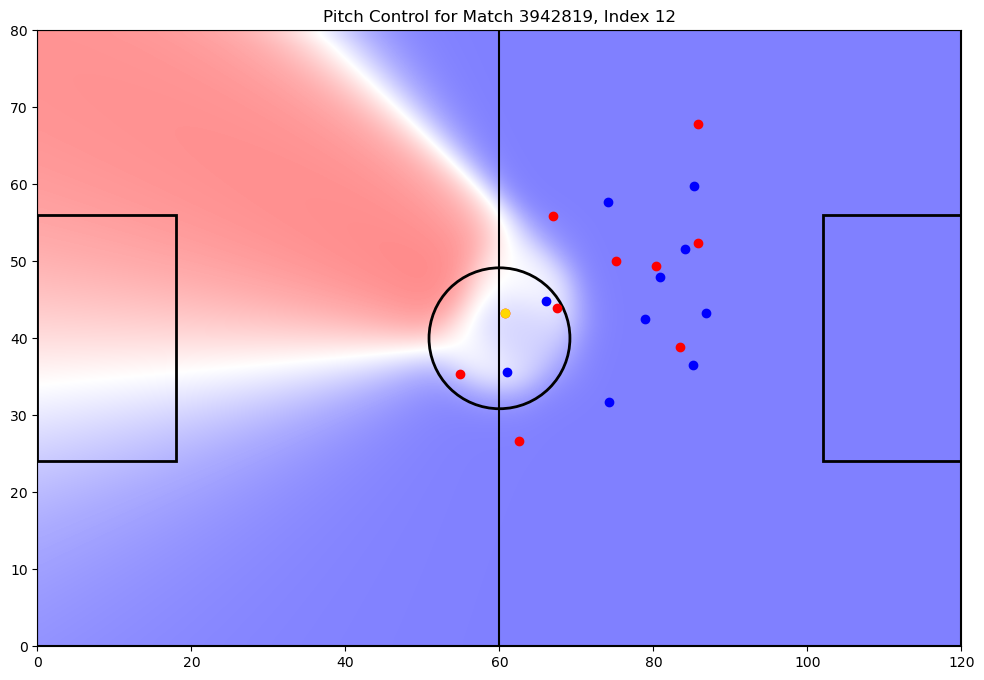

In [21]:
# Assuming you have the following functions already defined:
# - calculate_pitch_control
# - generate_pitch_control_for_event
# - plot_pitch_control_for_event
# - params = default_model_params()  # Define the default parameters.

# Filter the specific event
filtered_df = actions_df[(actions_df['match_id'] == 3942819) & (actions_df['index'] == 12)]

# Ensure filtered_df contains only one event
if len(filtered_df) != 1:
    raise ValueError("Filtered DataFrame must contain a single event.")

# Define event_id from the filtered event
event_id = filtered_df.index[0]  # Get the index of the filtered event

# Get the next event in the same period
next_event = actions_df[(actions_df['match_id'] == 3942819) & 
                        (actions_df['period'] == filtered_df.iloc[0]['period']) & 
                        (actions_df['index'] > filtered_df.iloc[0]['index'])].head(1)

# If no next event is found, handle it appropriately
if next_event.empty:
    raise ValueError("No subsequent event found in the same period.")

# Combine current and next events for velocity calculation
current_and_next_events = pd.concat([filtered_df, next_event])

# Now generate pitch control using the concatenated events
params = default_model_params()  # Get the model parameters

# Update: Ensure the event velocities have been calculated first.
actions_df_with_velocities, non_involved_velocities = calc_event_velocities(current_and_next_events)

# Now generate pitch control using the updated events with velocities
PPCFa, xgrid, ygrid = generate_pitch_control_for_event(event_id, actions_df_with_velocities, params)

# Plot the pitch control for this event
plot_pitch_control_for_event(filtered_df, actions_df, PPCFa, xgrid, ygrid)


In [47]:
filtered_df = actions_df[(actions_df['match_id'] == 3942819) & (actions_df['index'] == 12)]
filtered_df

,match_id,id,index,period,minute,second,duration,team_name,player_name,position_name,...,x,y,end_x,end_y,visible_area,freeze_frame,event_uuid,vx,vy,speed
3,3942819,a53891bd-f254-4786-adee-ec2ecd78e857,12,1,0,11,2.247506,England,John Stones,Center Back,...,60.7,43.3,85.1,51.3,"[84.87329142496212, 77.05638219685684, 50.6812...","[{'teammate': True, 'actor': False, 'keeper': ...",a53891bd-f254-4786-adee-ec2ecd78e857,-0.322434,-0.463323,0.564475


In [ ]:
def plot_pitchcontrol_for_event( event_id, events,  tracking_home, tracking_away, PPCF, alpha = 0.7, include_player_velocities=True, annotate=False, field_dimen = (106.0,68)):
    """ plot_pitchcontrol_for_event( event_id, events,  tracking_home, tracking_away, PPCF )
    
    Plots the pitch control surface at the instant of the event given by the event_id. Player and ball positions are overlaid.
    
    Parameters
    -----------
        event_id: Index (not row) of the event that describes the instant at which the pitch control surface should be calculated
        events: Dataframe containing the event data
        tracking_home: (entire) tracking DataFrame for the Home team
        tracking_away: (entire) tracking DataFrame for the Away team
        PPCF: Pitch control surface (dimen (n_grid_cells_x,n_grid_cells_y) ) containing pitch control probability for the attcking team (as returned by the generate_pitch_control_for_event in Metrica_PitchControl)
        alpha: alpha (transparency) of player markers. Default is 0.7
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        annotate: Boolean variable that determines with player jersey numbers are added to the plot (default is False)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        
    NB: this function no longer requires xgrid and ygrid as an input
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """    

    # pick a pass at which to generate the pitch control surface
    pass_frame = events.loc[event_id]['Start Frame']
    pass_team = events.loc[event_id].Team
    
    # plot frame and event
    fig,ax = plot_pitch(field_color='white', field_dimen = field_dimen)
    plot_frame( tracking_home.loc[pass_frame], tracking_away.loc[pass_frame], figax=(fig,ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate )
    plot_events( events.loc[event_id:event_id], figax = (fig,ax), indicators = ['Marker','Arrow'], annotate=False, color= 'k', alpha=1 )
    
    # plot pitch control surface
    if pass_team=='Home':
        cmap = 'bwr'
    else:
        cmap = 'bwr_r'
    ax.imshow(np.flipud(PPCF), extent=(-field_dimen[0]/2., field_dimen[0]/2., -field_dimen[1]/2., field_dimen[1]/2.),interpolation='spline36',vmin=0.0,vmax=1.0,cmap=cmap,alpha=0.5)

    return fig,ax

In [ ]:
 # initialise pitch control grids for attacking and defending teams 
    PPCFa = np.zeros( shape = (len(ygrid), len(xgrid)) )
    PPCFd = np.zeros( shape = (len(ygrid), len(xgrid)) )
    # initialise player positions and velocities for pitch control calc (so that we're not repeating this at each grid cell position)
    if pass_team=='Home':
        attacking_players = initialise_players(tracking_home.loc[pass_frame],'Home',params,GK_numbers[0])
        defending_players = initialise_players(tracking_away.loc[pass_frame],'Away',params,GK_numbers[1])
    elif pass_team=='Away':
        defending_players = initialise_players(tracking_home.loc[pass_frame],'Home',params,GK_numbers[0])
        attacking_players = initialise_players(tracking_away.loc[pass_frame],'Away',params,GK_numbers[1])
    else:
        assert False, "Team in possession must be either home or away"
        
         # calculate pitch pitch control model at each location on the pitch
    for i in range( len(ygrid) ):
        for j in range( len(xgrid) ):
            target_position = np.array( [xgrid[j], ygrid[i]] )
            PPCFa[i,j],PPCFd[i,j] = calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params)
    # check probabilitiy sums within convergence
    checksum = np.sum( PPCFa + PPCFd ) / float(n_grid_cells_y*n_grid_cells_x ) 
    assert 1-checksum < params['model_converge_tol'], "Checksum failed: %1.3f" % (1-checksum)
    return PPCFa,xgrid,ygrid

In [ ]:
# calculate ball travel time from start position to end position.
    if ball_start_pos is None or any(np.isnan(ball_start_pos)): # assume that ball is already at location
        ball_travel_time = 0.0 
    else:
        # ball travel time is distance to target position from current ball position divided assumed average ball speed
        ball_travel_time = np.linalg.norm( target_position - ball_start_pos )/params['average_ball_speed']
    
    # first get arrival time of 'nearest' attacking player (nearest also dependent on current velocity)
    tau_min_att = np.nanmin( [p.simple_time_to_intercept(target_position) for p in attacking_players] )
    tau_min_def = np.nanmin( [p.simple_time_to_intercept(target_position ) for p in defending_players] )
    
    # check whether we actually need to solve equation 3
    if tau_min_att-max(ball_travel_time,tau_min_def) >= params['time_to_control_def']:
        # if defending team can arrive significantly before attacking team, no need to solve pitch control model
        return 0., 1.
    elif tau_min_def-max(ball_travel_time,tau_min_att) >= params['time_to_control_att']:
        # if attacking team can arrive significantly before defending team, no need to solve pitch control model
        return 1., 0.
    else: 
        # solve pitch control model by integrating equation 3 in Spearman et al.
        # first remove any player that is far (in time) from the target location
        attacking_players = [p for p in attacking_players if p.time_to_intercept-tau_min_att < params['time_to_control_att'] ]
        defending_players = [p for p in defending_players if p.time_to_intercept-tau_min_def < params['time_to_control_def'] ]
        # set up integration arrays
        dT_array = np.arange(ball_travel_time-params['int_dt'],ball_travel_time+params['max_int_time'],params['int_dt']) 
        PPCFatt = np.zeros_like( dT_array )
        PPCFdef = np.zeros_like( dT_array )
        # integration equation 3 of Spearman 2018 until convergence or tolerance limit hit (see 'params')
        ptot = 0.0
        i = 1
        while 1-ptot>params['model_converge_tol'] and i<dT_array.size: 
            T = dT_array[i]
            for player in attacking_players:
                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1-PPCFatt[i-1]-PPCFdef[i-1])*player.probability_intercept_ball( T ) * player.lambda_att
                # make sure it's greater than zero
                assert dPPCFdT>=0, 'Invalid attacking player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT*params['int_dt'] # total contribution from individual player
                PPCFatt[i] += player.PPCF # add to sum over players in the attacking team (remembering array element is zero at the start of each integration iteration)
            for player in defending_players:
                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1-PPCFatt[i-1]-PPCFdef[i-1])*player.probability_intercept_ball( T ) * player.lambda_def
                # make sure it's greater than zero
                assert dPPCFdT>=0, 'Invalid defending player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT*params['int_dt'] # total contribution from individual player
                PPCFdef[i] += player.PPCF # add to sum over players in the defending team
            ptot = PPCFdef[i]+PPCFatt[i] # total pitch control probability 
            i += 1
        if i>=dT_array.size:
            print("Integration failed to converge: %1.3f" % (ptot) )
        return PPCFatt[i-1], PPCFdef[i-1]

In [11]:
def plot_events(actions_df, figax=None, field_dimen=(120.0, 80), indicators=['Marker', 'Arrow'], color='r', marker_style='o', alpha=0.5, annotate=False):
    """
    Plot events such as passes, shots, etc. on top of a pitch.
    
    Parameters:
    -----------
    actions_df: DataFrame
        DataFrame containing the event data (e.g., passes, shots, etc.).
    figax: tuple
        Tuple containing the figure and axis (fig, ax) of the pitch plot.
    field_dimen: tuple
        Dimensions of the pitch.
    indicators: list
        List of indicators to plot (e.g., 'Marker', 'Arrow').
    color: str
        Color of the plot (e.g., 'r' for red).
    marker_style: str
        Style of the marker (e.g., 'o' for circle).
    alpha: float
        Transparency of the markers and arrows.
    annotate: bool
        Whether to annotate the events with text.
    
    Returns:
    --------
    fig, ax: Matplotlib figure and axis objects.
    """
    if figax is None:  # Create new pitch
        fig, ax = plot_pitch(field_dimen=field_dimen)
    else:  # Overlay on a previously generated pitch
        fig, ax = figax
    
    # Iterate over the actions DataFrame to plot each event
    for i, row in actions_df.iterrows():
        if 'Marker' in indicators:
            ax.plot(row['x'], row['y'], color + marker_style, alpha=alpha)  # Start position
        if 'Arrow' in indicators and 'end_x' in row and 'end_y' in row:
            ax.annotate(
                "", xy=(row['end_x'], row['end_y']), xytext=(row['x'], row['y']),
                alpha=alpha, 
                arrowprops=dict(alpha=alpha, width=0.5, headlength=4.0, headwidth=4.0, color=color),
                annotation_clip=False
            )
        if annotate:
            textstring = row['type_name'] + ': ' + row['player_name']  # Adjust as needed
            ax.text(row['x'], row['y'], textstring, fontsize=10, color=color)
    
    return fig, ax

In [12]:
def plot_pitch_control_for_event(filtered_df, actions_df, PPCFa, xgrid, ygrid):
    """
    Plot the pitch control model for a specific event using filtered DataFrame.
    
    Parameters:
    -----------
    filtered_df : DataFrame
        DataFrame containing the filtered event data (single row).
    actions_df : DataFrame
        DataFrame containing all events data.
    PPCFa : np.array
        Pitch control surface for the attacking team.
    xgrid, ygrid : np.array
        Grid coordinates for the pitch.
    """
    
    # Ensure filtered_df contains only one event
    if len(filtered_df) != 1:
        raise ValueError("Filtered DataFrame must contain a single event.")

    # Extract event data from filtered_df
    event_data = filtered_df.iloc[0]
    
    # Plot the pitch using mplsoccer's Pitch class for StatsBomb
    pitch = Pitch(pitch_type='statsbomb')  # Use 'statsbomb' pitch type
    fig, ax = pitch.draw()

    # Plot the pitch control surface
    ax.imshow(np.flipud(PPCFa), interpolation='spline36', vmin=0.0, vmax=1.0, cmap='bwr', alpha=0.5)

    # Plot players from freeze_frame data
    freeze_frame_data = event_data['freeze_frame']

    for player in freeze_frame_data:
        player_position = np.array(player['location'])
        # Determine team and actor status
        if player['teammate']:
            color = 'r'  # Teammate (attacking team) in red
        else:
            color = 'b'  # Opponent (defending team) in blue
        
        # Highlight actor (player involved in the event) differently
        if player['actor']:
            ax.plot(player_position[0], player_position[1], 'o', color='gold', markersize=10, label='Actor')
        elif player['keeper']:
            ax.plot(player_position[0], player_position[1], 's', color=color, markersize=10, label='Keeper')  # Goalkeeper
        else:
            ax.plot(player_position[0], player_position[1], 'o', color=color)

    # Plot the ball position
    ball_position = np.array([event_data['x'], event_data['y']])
    ax.plot(ball_position[0], ball_position[1], 'ko', markersize=10, label='Ball')

    # Call the plot_events function to overlay events
    plot_events(filtered_df, figax=(fig, ax), indicators=['Arrow', 'Marker'], color='k', alpha=0.8)

    # Add labels, titles, etc.
    ax.set_title(f"Pitch Control for Match {event_data['match_id']}, Index {event_data['index']}")
    plt.show()

In [12]:
# Assuming filtered_df contains a single event, we can extract the necessary information
if not filtered_df.empty:
    event_id = filtered_df.iloc[0]['id']  # Event ID
    event_team = filtered_df.iloc[0]['team_name']  # Team name (Home or Away)
    match_id = filtered_df.iloc[0]['match_id']  # Match ID for the event
else:
    raise ValueError("No event found in filtered_df. Please check the filtering criteria.")

In [35]:
event_id

'25dfc952-7a85-464f-b884-982064d46cc9'

In [14]:
class Player:
    """
    Player object to hold position, velocity, time-to-intercept, and pitch control contributions.
    """

    def __init__(self, player_data, teamname, params, GKid=None):
        """
        Initialize the player using data from freeze_frame and parameters.
        
        Parameters:
        -----------
        player_data : dict
            Contains player information (location, velocity, team status).
        teamname : str
            'attacking' or 'defending' team.
        params : dict
            Contains model parameters such as speed and reaction time.
        GKid : int or None
            Goalkeeper ID (if any).
        """
        self.is_gk = player_data.get('keeper', False)  # Check if player is a goalkeeper
        self.teamname = teamname
        self.teammate = player_data.get('teammate', False)
        self.actor = player_data.get('actor', False)
        
        # Assign player attributes from freeze_frame data
        self.position = np.array(player_data['location'])  # Player position (x, y)
        self.velocity = np.array([player_data.get('vx', 0), player_data.get('vy', 0)])  # Velocity, if available
        
        # Player model parameters
        self.vmax = params['max_player_speed']  # Max player speed
        self.reaction_time = params['reaction_time']  # Reaction time in seconds
        self.tti_sigma = params['tti_sigma']  # Std. dev. of time-to-intercept
        self.lambda_att = params['lambda_att']  # Attacking lambda factor
        self.lambda_def = params['lambda_gk'] if self.is_gk else params['lambda_def']  # Defensive lambda factor
        
        # Initialize pitch control contribution
        self.PPCF = 0.0  # Pitch Control Contribution Factor (PPCF)

    def simple_time_to_intercept(self, r_final):
        """
        Calculate the time to intercept a target location (r_final).
        """
        self.PPCF = 0.0  # Reset PPCF for this calculation
        
        # Time to intercept assumes reaction time + running at full speed
        r_reaction = self.position + self.velocity * self.reaction_time
        self.time_to_intercept = self.reaction_time + np.linalg.norm(r_final - r_reaction) / self.vmax
        return self.time_to_intercept

    def probability_intercept_ball(self, T):
        """
        Calculate the probability of intercepting the ball at time T.
        """
        f = 1 / (1. + np.exp(-np.pi / np.sqrt(3.0) / self.tti_sigma * (T - self.time_to_intercept)))
        return f

In [15]:
def default_model_params(time_to_control_veto=3):
    """
    Returns the default parameters for pitch control calculation, modified for a 120x80 pitch.
    
    Parameters:
    -----------
    time_to_control_veto: If the probability that another team or player can get to the ball and control it 
    is less than 10^-time_to_control_veto, ignore that player.
    
    Returns:
    -----------
    params: Dictionary of parameters required for the model.
    """
    pitch_length_ratio = 120 / 106  # Ratio of new pitch length to old
    pitch_area_ratio = (120 * 80) / (106 * 68)  # Ratio of new pitch area to old

    params = {}
    # Player and ball control parameters
    params['max_player_accel'] = 7.0  # Max player acceleration (unchanged)
    
    # Scale max player speed by pitch length ratio
    params['max_player_speed'] = 5.0 * pitch_length_ratio  # Max player speed in m/s (scaled)
    
    params['reaction_time'] = 0.7  # Reaction time in seconds (unchanged)
    
    params['tti_sigma'] = 0.45  # Std. dev. of sigmoid function for time-to-intercept uncertainty (unchanged)
    
    params['kappa_def'] = 1.0  # Defender advantage in ball control probability (unchanged)
    
    # Scale ball control parameters (lambda_att and lambda_def) by pitch area ratio
    params['lambda_att'] = 4.3 * pitch_area_ratio  # Attacking ball control parameter (scaled)
    params['lambda_def'] = 4.3 * params['kappa_def'] * pitch_area_ratio  # Defending ball control parameter (scaled)
    
    # Goalkeeper's advantage also scaled by the same factor
    params['lambda_gk'] = params['lambda_def'] * 3.0  # Goalkeepers' advantage (scaled)
    
    # Scale average ball speed by pitch length ratio
    params['average_ball_speed'] = 15.0 * pitch_length_ratio  # Average ball speed in m/s (scaled)
    
    # Integration parameters for event-based data
    params['int_dt'] = 1.0  # Integration timestep (unchanged)
    params['max_int_time'] = 5.0  # Upper limit on integral time (unchanged)

    # Convergence parameters
    params['model_converge_tol'] = 0.01  # Convergence when PPCF > 0.99 at a location (unchanged)
    
    # Time to control cutoff parameters for ball control (unchanged)
    params['time_to_control_att'] = time_to_control_veto * np.log(10) * (np.sqrt(3) * params['tti_sigma'] / np.pi + 1 / params['lambda_att'])
    params['time_to_control_def'] = time_to_control_veto * np.log(10) * (np.sqrt(3) * params['tti_sigma'] / np.pi + 1 / params['lambda_def'])
    
    return params

In [16]:
def generate_pitch_control_for_event(event_id, actions_df, params, field_dimen=(120, 80), n_grid_cells_x=100):
    """
    Generates pitch control surface using StatsBomb data.
    
    Parameters:
    -----------
    event_id: int
        Index of the event for which to calculate the pitch control.
    actions_df: DataFrame
        DataFrame containing event data.
    params: dict
        Dictionary of model parameters.
    field_dimen: tuple
        Dimensions of the pitch in meters.
    n_grid_cells_x: int
        Number of grid cells along the x-direction.
    
    Returns:
    --------
    PPCFa: np.array
        Pitch control surface for the attacking team.
    xgrid, ygrid: np.array
        Grid coordinates for the pitch.
    """
    
    # Extract event data
    event_data = actions_df.loc[event_id]
    
    # Get the team in possession and the ball start position
    pass_team = event_data['team_name']
    ball_start_pos = np.array([event_data['x'], event_data['y']])
    
    # Extract the event duration
    event_duration = event_data['duration']  # Use this value to set the timestep and max integration time
    
    # Set dynamic integration parameters based on event duration
    params['int_dt'] = event_duration  # Use 1/10th of the event duration as the timestep
    params['max_int_time'] = event_duration * 1.5  # Set the max integration time to 1.5x the event duration
    
    # Break the pitch down into a grid
    n_grid_cells_y = int(n_grid_cells_x * field_dimen[1] / field_dimen[0])
    dx = field_dimen[0] / n_grid_cells_x
    dy = field_dimen[1] / n_grid_cells_y
    xgrid = np.arange(n_grid_cells_x) * dx - field_dimen[0] / 2. + dx / 2.
    ygrid = np.arange(n_grid_cells_y) * dy - field_dimen[1] / 2. + dy / 2.
    
    # Initialise pitch control grids for attacking and defending teams
    PPCFa = np.zeros((len(ygrid), len(xgrid)))
    PPCFd = np.zeros((len(ygrid), len(xgrid)))
    
    # Extract player positions and velocities from freeze_frame or other columns
    attacking_players = []  # Store attacking players
    defending_players = []  # Store defending players
    
    freeze_frame_data = event_data['freeze_frame']
    
    for player in freeze_frame_data:
        player_position = np.array(player['location'])
        player_velocity = np.array([player.get('vx', 0), player.get('vy', 0)])  # Use velocity if available, or 0
        
        player_obj = Player(
            pid=player.get('player_name', None),  # Assuming player name or ID exists
            teamname=player['teammate'],
            params=params,
            GKid=None,  # You can adjust this for goalkeepers if necessary
            event_data={'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]}
        )
        
        if player['teammate'] == pass_team:
            attacking_players.append(player_obj)
        else:
            defending_players.append(player_obj)

    # Calculate pitch control at each grid cell location
    for i in range(len(ygrid)):
        for j in range(len(xgrid)):
            target_position = np.array([xgrid[j], ygrid[i]])
            PPCFa[i, j], PPCFd[i, j] = calculate_pitch_control_at_target(
                target_position, attacking_players, defending_players, ball_start_pos, params, event_duration
            )
    
    # Ensure that the probabilities sum to 1 (checksum)
    checksum = np.sum(PPCFa + PPCFd) / float(n_grid_cells_y * n_grid_cells_x)
    assert 1 - checksum < params['model_converge_tol'], f"Checksum failed: {1-checksum:.3f}"
    
    return PPCFa, xgrid, ygrid


In [21]:
def generate_pitch_control_for_event(event_id, actions_df, params, field_dimen=(120, 80), n_grid_cells_x=100):
    """
    Generates pitch control surface using StatsBomb data.
    
    Parameters:
    -----------
    event_id: int
        Index of the event for which to calculate the pitch control.
    actions_df: DataFrame
        DataFrame containing event data.
    params: dict
        Dictionary of model parameters.
    field_dimen: tuple
        Dimensions of the pitch in meters.
    n_grid_cells_x: int
        Number of grid cells along the x-direction.
    
    Returns:
    --------
    PPCFa: np.array
        Pitch control surface for the attacking team.
    xgrid, ygrid: np.array
        Grid coordinates for the pitch.
    """
    
    # Extract event data
    event_data = actions_df.loc[event_id]
    
    # Get the team in possession and the ball start position
    action_team = event_data['team_name']
    ball_start_pos = np.array([event_data['x'], event_data['y']])
    
    # Extract the event duration
    event_duration = event_data['duration']  # Use this value to set the timestep and max integration time
    
    # Set dynamic integration parameters based on event duration
    # Set dynamic integration parameters based on event duration
    params['int_dt'] = (event_duration)  # Ensure the time step isn't too small
    params['max_int_time'] = event_duration * 1.5  # Set the max integration time to 1.5x the event duration

    #params['int_dt'] = event_duration / 10  # Use 1/10th of the event duration as the timestep
    #params['max_int_time'] = event_duration * 1.5  # Set the max integration time to 1.5x the event duration
    
    # Break the pitch down into a grid
    n_grid_cells_y = int(n_grid_cells_x * field_dimen[1] / field_dimen[0])
    dx = field_dimen[0] / n_grid_cells_x
    dy = field_dimen[1] / n_grid_cells_y
    xgrid = np.arange(n_grid_cells_x) * dx - field_dimen[0] / 2. + dx / 2.
    ygrid = np.arange(n_grid_cells_y) * dy - field_dimen[1] / 2. + dy / 2.
    
    # Initialise pitch control grids for attacking and defending teams
    PPCFa = np.zeros((len(ygrid), len(xgrid)))
    PPCFd = np.zeros((len(ygrid), len(xgrid)))
    
    # Extract player positions and velocities from freeze_frame or other columns
    attacking_players = []  # Store attacking players
    defending_players = []  # Store defending players
    
    freeze_frame_data = event_data['freeze_frame']
    
    for player in freeze_frame_data:
        team = 'attacking' if player['teammate'] else 'defending'
        
        # Create a Player object
        player_obj = Player(player_data=player, teamname=team, params=params)
        
        # Assign to respective teams
        if player['teammate']:
            attacking_players.append(player_obj)
        else:
            defending_players.append(player_obj)

    # Calculate pitch control at each grid cell location
    for i in range(len(ygrid)):
        for j in range(len(xgrid)):
            target_position = np.array([xgrid[j], ygrid[i]])
            PPCFa[i, j], PPCFd[i, j] = calculate_pitch_control_at_target(
                target_position, attacking_players, defending_players, ball_start_pos, params, event_data['duration']
            )
    
    # Ensure that the probabilities sum to 1 (checksum)
    checksum = np.sum(PPCFa + PPCFd) / float(n_grid_cells_y * n_grid_cells_x)
    assert 1 - checksum < params['model_converge_tol'], f"Checksum failed: {1-checksum:.3f}"
    
    return PPCFa, xgrid, ygrid

In [17]:
def calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params, event_duration):
    """
    Calculates the pitch control probability for the attacking and defending teams at a specified target position.
    
    Parameters
    -----------
    - target_position: numpy array (x, y) position on the field for pitch control calculation
    - attacking_players: list of attacking players
    - defending_players: list of defending players
    - ball_start_pos: Current position of the ball
    - params: Dictionary of model parameters
    - event_duration: Duration of the current event to be used as integration timestep
    
    Returns
    -----------
    - PPCFatt: Pitch control probability for the attacking team
    - PPCFdef: Pitch control probability for the defending team
    """
    # Calculate ball travel time from start position to target position.
    if ball_start_pos is None or any(np.isnan(ball_start_pos)):
        # Assume the ball is already at the target location
        ball_travel_time = 0.0
    else:
        # Ball travel time is distance to target position divided by average ball speed
        ball_travel_time = np.linalg.norm(target_position - ball_start_pos) / params['average_ball_speed']
    
    # First, get the arrival time of the 'nearest' attacking and defending players
    tau_min_att = np.nanmin([p.simple_time_to_intercept(target_position) for p in attacking_players])
    tau_min_def = np.nanmin([p.simple_time_to_intercept(target_position) for p in defending_players])
    
    # Check if one team can dominate control by arriving significantly earlier
    if tau_min_att - max(ball_travel_time, tau_min_def) >= params['time_to_control_def']:
        # Defending team arrives significantly earlier
        return 0., 1.
    elif tau_min_def - max(ball_travel_time, tau_min_att) >= params['time_to_control_att']:
        # Attacking team arrives significantly earlier
        return 1., 0.
    else:
        # Solve the pitch control model by integrating the equations (Equation 3 in Spearman et al.)
        # First, filter out players that are too far (in time) from the target location
        attacking_players = [p for p in attacking_players if p.time_to_intercept - tau_min_att < params['time_to_control_att']]
        defending_players = [p for p in defending_players if p.time_to_intercept - tau_min_def < params['time_to_control_def']]
        
        # Set up integration arrays for time intervals (dT_array), starting from ball travel time
        dT_array = np.arange(ball_travel_time - event_duration, ball_travel_time + params['max_int_time'], event_duration)
        PPCFatt = np.zeros_like(dT_array)
        PPCFdef = np.zeros_like(dT_array)
        
        # Integration loop (solving Equation 3 from Spearman et al.)
        ptot = 0.0
        i = 1
        while 1 - ptot > params['model_converge_tol'] and i < dT_array.size:
            T = dT_array[i]
            
            # Calculate contribution from attacking players
            for player in attacking_players:
                dPPCFdT = (1 - PPCFatt[i-1] - PPCFdef[i-1]) * player.probability_intercept_ball(T) * player.lambda_att
                assert dPPCFdT >= 0, 'Invalid attacking player probability (negative)'
                player.PPCF += dPPCFdT * event_duration
                PPCFatt[i] += player.PPCF
            
            # Calculate contribution from defending players
            for player in defending_players:
                dPPCFdT = (1 - PPCFatt[i-1] - PPCFdef[i-1]) * player.probability_intercept_ball(T) * player.lambda_def
                assert dPPCFdT >= 0, 'Invalid defending player probability (negative)'
                player.PPCF += dPPCFdT * event_duration
                PPCFdef[i] += player.PPCF
            
            # Total pitch control probability at this timestep
            ptot = PPCFdef[i] + PPCFatt[i]
            i += 1
        
        if i >= dT_array.size:
            print(f"Integration failed to converge: {ptot:.3f}")
        
        # Return the final pitch control probabilities for the attacking and defending teams
        return PPCFatt[i-1], PPCFdef[i-1]

Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration failed to converge: 0.000
Integration 

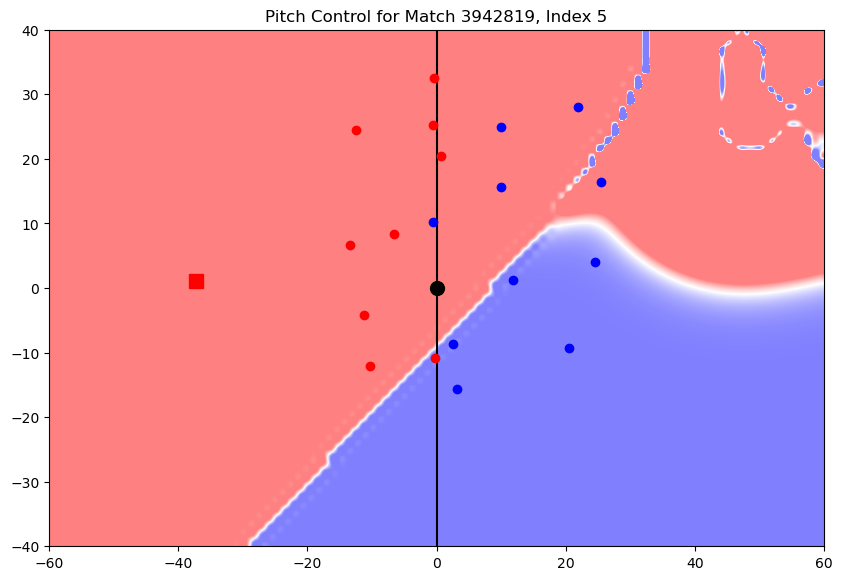

In [22]:
def plot_pitch(field_dimen=(120, 80), field_color='white'):
    """
    Create a plot of a football pitch.
    
    Parameters:
    -----------
    field_dimen: tuple
        Dimensions of the pitch (length, width).
    field_color: str
        Color of the pitch background.
    
    Returns:
    --------
    fig, ax : Matplotlib figure and axis objects.
    """
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Set pitch boundaries
    ax.set_xlim([-field_dimen[0] / 2, field_dimen[0] / 2])
    ax.set_ylim([-field_dimen[1] / 2, field_dimen[1] / 2])
    ax.set_facecolor(field_color)

    # Plot center line
    ax.plot([0, 0], [-field_dimen[1] / 2, field_dimen[1] / 2], color="black")

    return fig, ax

def plot_pitch_control_for_event(filtered_df, actions_df, PPCFa, xgrid, ygrid):
    """
    Plot the pitch control model for a specific event using filtered DataFrame.
    
    Parameters:
    -----------
    filtered_df : DataFrame
        DataFrame containing the filtered event data (single row).
    actions_df : DataFrame
        DataFrame containing all events data.
    PPCFa : np.array
        Pitch control surface for the attacking team.
    xgrid, ygrid : np.array
        Grid coordinates for the pitch.
    """
    
    # Ensure filtered_df contains only one event
    if len(filtered_df) != 1:
        raise ValueError("Filtered DataFrame must contain a single event.")

    # Extract event data from filtered_df
    event_data = filtered_df.iloc[0]
    
    # Plot the pitch
    fig, ax = plot_pitch()

    # Plot the pitch control surface
    ax.imshow(np.flipud(PPCFa), extent=(-120/2, 120/2, -80/2, 80/2), interpolation='spline36', vmin=0.0, vmax=1.0, cmap='bwr', alpha=0.5)

    # Plot players from freeze_frame data
    freeze_frame_data = event_data['freeze_frame']

    for player in freeze_frame_data:
        player_position = np.array(player['location'])
        # Determine team and actor status
        if player['teammate']:
            color = 'r'  # Teammate (attacking team) in red
        else:
            color = 'b'  # Opponent (defending team) in blue
        
        # Highlight actor (player involved in the event) differently
        if player['actor']:
            ax.plot(player_position[0] - 120/2, player_position[1] - 80/2, 'o', color='gold', markersize=10, label='Actor')
        elif player['keeper']:
            ax.plot(player_position[0] - 120/2, player_position[1] - 80/2, 's', color=color, markersize=10, label='Keeper')  # Goalkeeper
        else:
            ax.plot(player_position[0] - 120/2, player_position[1] - 80/2, 'o', color=color)

    # Plot the ball position
    ball_position = np.array([event_data['x'], event_data['y']])
    ax.plot(ball_position[0] - 120/2, ball_position[1] - 80/2, 'ko', markersize=10, label='Ball')

    # Add labels, titles, etc.
    ax.set_title(f"Pitch Control for Match {event_data['match_id']}, Index {event_data['index']}")
    plt.show()

# Example Usage:

# Initialize the model parameters
params = default_model_params()

# Filter specific event by match_id and index
filtered_df = actions_df[(actions_df['match_id'] == 3942819) & (actions_df['index'] == 5)]

# Assume you have already calculated PPCFa, xgrid, and ygrid for the event
PPCFa, xgrid, ygrid = generate_pitch_control_for_event(filtered_df.index[0], actions_df, params)

# Plot the pitch control and event data using filtered_df
plot_pitch_control_for_event(filtered_df, actions_df, PPCFa, xgrid, ygrid)

In [46]:
# Print the freeze_frame data for the filtered event to inspect the structure
print(filtered_df.iloc[0]['freeze_frame'])

[{'teammate': True, 'actor': False, 'keeper': True, 'location': [22.697541663925428, 41.01277368603656]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [46.54665402564941, 46.65992069066397]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [47.44522057974756, 64.52929870627902]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [48.81954571089864, 35.810976155696935]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [49.74595437091587, 27.859841158806844]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [53.468934094140124, 48.359720135671516]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [59.39295936892726, 65.20967497250402]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [59.51839890069241, 50.247564716443506]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [59.63379273609168, 72.56790108034444]}, {'teammate': True, 'actor': False, 'keeper': Fal

In [ ]:
def generate_pitch_control_for_event(event_id, actions_df, params, field_dimen=(120., 80.), n_grid_cells_x=50):
    """
    Generates pitch control surface using StatsBomb data.
    
    Parameters:
    -----------
    event_id: int
        Index of the event for which to calculate the pitch control.
    actions_df: DataFrame
        DataFrame containing event data.
    params: dict
        Dictionary of model parameters.
    field_dimen: tuple
        Dimensions of the pitch in meters.
    n_grid_cells_x: int
        Number of grid cells along the x-direction.
    
    Returns:
    --------
    PPCFa: np.array
        Pitch control surface for the attacking team.
    xgrid, ygrid: np.array
        Grid coordinates for the pitch.
    """
    
    # Extract event data
    event_data = actions_df.loc[event_id]
    
    # Get the team in possession and the ball start position
    pass_team = event_data['team_name']
    ball_start_pos = np.array([event_data['x'], event_data['y']])
    
    # Break the pitch down into a grid
    n_grid_cells_y = int(n_grid_cells_x * field_dimen[1] / field_dimen[0])
    dx = field_dimen[0] / n_grid_cells_x
    dy = field_dimen[1] / n_grid_cells_y
    xgrid = np.arange(n_grid_cells_x) * dx - field_dimen[0] / 2. + dx / 2.
    ygrid = np.arange(n_grid_cells_y) * dy - field_dimen[1] / 2. + dy / 2.
    
    # Initialise pitch control grids for attacking and defending teams
    PPCFa = np.zeros((len(ygrid), len(xgrid)))
    PPCFd = np.zeros((len(ygrid), len(xgrid)))
    
    # Extract player positions and velocities from freeze_frame or other columns
    attacking_players = []  # Store attacking players
    defending_players = []  # Store defending players
    
    freeze_frame_data = event_data['freeze_frame']
    
    for player in freeze_frame_data:
        player_id = player['player_id']
        team = player['team']
        player_position = np.array([player['location'][0], player['location'][1]])
        player_velocity = np.array([player.get('vx', 0), player.get('vy', 0)])  # Use velocity if available, or 0
        
        player_obj = Player(player_id, team, params, None, {'x': player_position[0], 'y': player_position[1], 'vx': player_velocity[0], 'vy': player_velocity[1]})
        
        if team == pass_team:
            attacking_players.append(player_obj)
        else:
            defending_players.append(player_obj)

    # Calculate pitch control at each grid cell location
    for i in range(len(ygrid)):
        for j in range(len(xgrid)):
            target_position = np.array([xgrid[j], ygrid[i]])
            PPCFa[i, j], PPCFd[i, j] = calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params)
    
    # Ensure that the probabilities sum to 1 (checksum)
    checksum = np.sum(PPCFa + PPCFd) / float(n_grid_cells_y * n_grid_cells_x)
    assert 1 - checksum < params['model_converge_tol'], f"Checksum failed: {1-checksum:.3f}"
    
    return PPCFa, xgrid, ygrid


In [ ]:
def calculate_pitch_control_at_target(target_position, attacking_players, defending_players, ball_start_pos, params, event_duration):
    """
    Calculates the pitch control probability for the attacking and defending teams at a specified target position.
    
    Parameters
    -----------
    - target_position: numpy array (x, y) position on the field for pitch control calculation
    - attacking_players: list of attacking players
    - defending_players: list of defending players
    - ball_start_pos: Current position of the ball
    - params: Dictionary of model parameters
    - event_duration: Duration of the current event to be used as integration timestep
    
    Returns
    -----------
    - PPCFatt: Pitch control probability for the attacking team
    - PPCFdef: Pitch control probability for the defending team
    """
    # Ball travel time calculation (no change needed)
    if ball_start_pos is None or any(np.isnan(ball_start_pos)):
        ball_travel_time = 0.0
    else:
        ball_travel_time = np.linalg.norm(target_position - ball_start_pos) / params['average_ball_speed']
    
    # Get the minimum time-to-intercept for both teams
    tau_min_att = np.nanmin([p.simple_time_to_intercept(target_position) for p in attacking_players])
    tau_min_def = np.nanmin([p.simple_time_to_intercept(target_position) for p in defending_players])
    
    # Early return if one team significantly dominates pitch control
    if tau_min_att - max(ball_travel_time, tau_min_def) >= params['time_to_control_def']:
        return 0., 1.
    elif tau_min_def - max(ball_travel_time, tau_min_att) >= params['time_to_control_att']:
        return 1., 0.
    
    # Solve pitch control model via integration (using event duration as integration timestep)
    attacking_players = [p for p in attacking_players if p.time_to_intercept - tau_min_att < params['time_to_control_att']]
    defending_players = [p for p in defending_players if p.time_to_intercept - tau_min_def < params['time_to_control_def']]
    
    dT_array = np.arange(ball_travel_time - event_duration, ball_travel_time + params['max_int_time'], event_duration)
    PPCFatt = np.zeros_like(dT_array)
    PPCFdef = np.zeros_like(dT_array)
    
    # Integration loop to solve pitch control model
    ptot = 0.0
    i = 1
    while 1 - ptot > params['model_converge_tol'] and i < dT_array.size:
        T = dT_array[i]
        for player in attacking_players:
            dPPCFdT = (1 - PPCFatt[i-1] - PPCFdef[i-1]) * player.probability_intercept_ball(T) * player.lambda_att
            assert dPPCFdT >= 0, 'Invalid attacking player probability'
            player.PPCF += dPPCFdT * event_duration
            PPCFatt[i] += player.PPCF
        
        for player in defending_players:
            dPPCFdT = (1 - PPCFatt[i-1] - PPCFdef[i-1]) * player.probability_intercept_ball(T) * player.lambda_def
            assert dPPCFdT >= 0, 'Invalid defending player probability'
            player.PPCF += dPPCFdT * event_duration
            PPCFdef[i] += player.PPCF
        
        ptot = PPCFdef[i] + PPCFatt[i]
        i += 1
    
    if i >= dT_array.size:
        print(f"Integration failed to converge: {ptot:.3f}")
    
    return PPCFatt[i-1], PPCFdef[i-1]

In [31]:
class Player:
    """
    Player object to hold position, velocity, time-to-intercept (tti), and pitch control contributions (PPCF) for each player.
    """
    def __init__(self, pid, team, teamname, params, GKid, event_data):
        self.id = pid
        self.is_gk = self.id == GKid
        self.teamname = teamname
        self.playername = "%s_%s_" % (teamname, pid)
        self.vmax = params['max_player_speed']  # Max speed (you can customize this)
        self.reaction_time = params['reaction_time']  # Reaction time
        self.tti_sigma = params['tti_sigma']  # Std. deviation of the sigmoid function
        self.lambda_att = params['lambda_att']  # Attacking lambda factor
        self.lambda_def = params['lambda_gk'] if self.is_gk else params['lambda_def']  # Defending lambda factor
        self.position = self.get_position(event_data)  # Extract player position from event data
        self.velocity = self.get_velocity(event_data)  # Extract or calculate velocity
        self.PPCF = 0.  # Initialize Pitch Control Contribution Factor (PPCF)

    def get_position(self, event_data):
        """
        Extracts the player's position from event data.
        event_data: A row from actions_df or filtered_df.
        """
        # In StatsBomb data, positions are stored in 'x' and 'y' columns.
        return np.array([event_data['x'], event_data['y']])

    def get_velocity(self, event_data):
        """
        Approximates the player's velocity based on event data.
        If available, use pre-calculated velocities; otherwise, calculate based on movement between events.
        """
        if 'vx' in event_data and 'vy' in event_data:
            # If velocity is already calculated in the event data, use it
            return np.array([event_data['vx'], event_data['vy']])
        else:
            # Approximate velocity using event positions and duration (if available)
            # You can improve this by calculating velocities between consecutive events
            return np.array([0, 0])  # Default to zero if velocity is not available

    def calculate_tti(self, ball_position):
        """
        Calculate time-to-intercept (tti) based on player's current position, velocity, and ball position.
        """
        # Use a simple Euclidean distance to calculate time-to-intercept
        distance_to_ball = np.linalg.norm(self.position - ball_position)
        tti = distance_to_ball / self.vmax  # Time to intercept assuming max speed
        return tti

In [32]:
def generate_pitch_control_for_event(event_id, actions_df, field_dimen=(120, 80), offsides=True, params=None):
    """
    Generate pitch control surface for an event using StatsBomb data.
    """

    # Extract event data
    event_data = actions_df.loc[event_id]
    home_team_players = []
    away_team_players = []

    # Loop over freeze frame data to create Player objects for each team
    for player_data in event_data['freeze_frame']:  # Assuming freeze_frame contains player info
        team_name = player_data['team']
        player_id = player_data['player_id']
        player_position = player_data['position']

        if team_name == 'Home':
            home_team_players.append(Player(player_id, player_position, 'Home', params, event_data['gk_id'], event_data))
        else:
            away_team_players.append(Player(player_id, player_position, 'Away', params, event_data['gk_id'], event_data))

    # Now calculate the pitch control based on player positions, velocities, and time-to-intercept (TTI)
    # This would involve calculating each player's PPCF contribution for different grid cells on the pitch.

    # Simulate a placeholder PPCF surface (you would replace this with your actual pitch control calculation)
    PPCF = np.random.rand(50, 50)  # Placeholder for now

    # Return the pitch control surface (PPCF) and grid
    xgrid = np.linspace(-field_dimen[0] / 2., field_dimen[0] / 2., num=50)
    ygrid = np.linspace(-field_dimen[1] / 2., field_dimen[1] / 2., num=50)

    return PPCF, xgrid, ygrid

In [36]:
# Example usage
PPCF, xgrid, ygrid = generate_pitch_control_for_event(
    event_id=event_id,  # Use event ID from filtered_df
    actions_df=actions_df,  # Pass the full event data
    field_dimen=(120, 80),  # Field dimensions
)

KeyError: '25dfc952-7a85-464f-b884-982064d46cc9'

In [26]:
def plot_pitchcontrol_for_event(filtered_df, actions_df, PPCF, alpha=0.7, include_player_velocities=True, annotate=False, field_dimen=(120, 80)):
    """
    Plot the pitch control for a specific event, showing player positions and pitch control surface.

    Parameters:
    -----------
    filtered_df : DataFrame
        DataFrame containing the filtered event data (single row).
    actions_df : DataFrame
        DataFrame containing all events data (e.g., passes, carries, etc.).
    PPCF : np.array
        The pitch control probability surface (2D array).
    alpha : float
        Alpha value for player transparency.
    include_player_velocities : bool
        Whether to include velocity vectors for players.
    annotate : bool
        Whether to annotate the players' numbers.
    field_dimen : tuple
        Dimensions of the pitch (width, height).

    Returns:
    --------
    fig, ax : Matplotlib figure and axis objects.
    """
    
    # Step 1: Extract event data from filtered_df
    if filtered_df.empty:
        raise ValueError("Filtered DataFrame is empty. Ensure event filtering is correct.")
    
    event_data = filtered_df.iloc[0]  # Assuming a single row in filtered_df
    action_team = event_data['team_name']  # Team name of the passer
    
    # Step 2: Set up the plot for the pitch
    fig, ax = plot_pitch(field_color='white', field_dimen=field_dimen)

    # Step 3: Plot the players' positions (assuming freeze_frame is available in event_data)
    freeze_frame = event_data['freeze_frame']  # Assuming freeze_frame contains player positions
    plot_frame(freeze_frame, figax=(fig, ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate)

    # Step 4: Plot the event itself (e.g., pass)
    plot_events(actions_df.loc[[event_data['id']]], figax=(fig, ax), indicators=['Marker', 'Arrow'], annotate=False, color='k', alpha=1)

    # Step 5: Plot the pitch control surface (PPCF)
    if pass_team == 'Home':
        cmap = 'bwr'  # Home team controls in red, away in blue
    else:
        cmap = 'bwr_r'  # Away team controls in red, home in blue

    # Plot the pitch control surface
    ax.imshow(np.flipud(PPCF), extent=(-field_dimen[0] / 2., field_dimen[0] / 2., -field_dimen[1] / 2., field_dimen[1] / 2.), interpolation='spline36', vmin=0.0, vmax=1.0, cmap=cmap, alpha=0.5)

    return fig, ax

In [30]:
# Assuming you have already filtered the event using filtered_df and actions_df is the main DataFrame
# First, generate the PPCF (Pitch Control Surface)
PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
    event_id=filtered_df.iloc[0]['id'],  # Extract the event ID from filtered_df
    actions_df=actions_df,  # Pass the full actions data
    field_dimen=(120, 80),  # Field dimensions (adjust as needed)
)

# Now, plot the pitch control for the event
fig, ax = plot_pitchcontrol_for_event(filtered_df, actions_df, PPCF)

# Optionally, display the plot
plt.show()

TypeError: generate_pitch_control_for_event() got an unexpected keyword argument 'actions_df'

In [27]:
# Assuming `filtered_df` has the specific event and `PPCF` has the pitch control data
fig, ax = plot_pitchcontrol_for_event(filtered_df, actions_df, PPCF)

NameError: name 'PPCF' is not defined

In [21]:
def plot_pitchcontrol_for_event(event_id, actions_df, PPCF, match_id, alpha=0.7, include_player_velocities=True, annotate=False, field_dimen=(120,80)):
    """
    Plot the pitch control for a specific event, showing player positions and pitch control surface.
    """
    
    # Step 1: Access the event data from actions_df
    event_data = actions_df.loc[event_id]
    pass_team = event_data['team_name']  # Get the team that made the pass
    
    # Step 2: Filter tracking data by match_id
    home_tracking = tracking_home[tracking_home['match_id'] == match_id]
    away_tracking = tracking_away[tracking_away['match_id'] == match_id]
    
    # Step 3: Set up the plot for the pitch
    fig, ax = plot_pitch(field_color='white', field_dimen=field_dimen)

    # Step 4: Plot the players' positions (use the tracking data for this match)
    plot_frame(home_tracking, away_tracking, figax=(fig, ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate)

    # Step 5: Plot the event itself (e.g., pass)
    plot_events(actions_df.loc[[event_id]], figax=(fig, ax), indicators=['Marker', 'Arrow'], annotate=False, color='k', alpha=1)

    # Step 6: Plot the pitch control surface (PPCF)
    if pass_team == 'Home':
        cmap = 'bwr'  # Home team controls in red, away in blue
    else:
        cmap = 'bwr_r'  # Away team controls in red, home in blue

    # Plot the pitch control surface
    ax.imshow(np.flipud(PPCF), extent=(-field_dimen[0] / 2., field_dimen[0] / 2., -field_dimen[1] / 2., field_dimen[1] / 2.), interpolation='spline36', vmin=0.0, vmax=1.0, cmap=cmap, alpha=0.5)

    return fig, ax

In [22]:
def plot_EPV_for_event(event_id, events, PPCF, EPV, match_id, alpha=0.7, include_player_velocities=True, annotate=False, autoscale=0.1, contours=False, field_dimen=(120, 80)):
    """
    Plot Expected Possession Value (EPV) overlaid on pitch control surface (PPCF) for a specific event.
    """
    
    # Step 1: Access the event data from actions_df (event_id, event_team, match_id)
    event_data = events.loc[event_id]
    event_team = event_data['team_name']  # Team name (Home or Away)

    # Step 2: Filter tracking data by match_id
    home_tracking = tracking_home[tracking_home['match_id'] == match_id]
    away_tracking = tracking_away[tracking_away['match_id'] == match_id]
    
    # Step 3: Set up the plot for the pitch
    fig, ax = plot_pitch(field_color='white', field_dimen=field_dimen)
    
    # Step 4: Plot the players' positions at the time of the pass (use the filtered tracking data)
    plot_frame(home_tracking, away_tracking, figax=(fig, ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate)
    
    # Step 5: Plot the event itself (e.g., pass)
    plot_events(events.loc[event_id:event_id], figax=(fig, ax), indicators=['Marker', 'Arrow'], annotate=False, color='k', alpha=1)
    
    # Step 6: Set colormap based on the team making the pass (home or away)
    if event_team == 'Home':
        cmap = 'Reds'  # Use red shades for the home team
        lcolor = 'r'   # Contour line color for home team
    else:
        cmap = 'Blues'  # Use blue shades for the away team
        lcolor = 'b'    # Contour line color for away team
    
    # Step 7: Calculate EPV x PPCF (expected possession value adjusted by pitch control)
    EPVxPPCF = PPCF * EPV
    
    # Step 8: Handle autoscaling
    if autoscale is True:
        vmax = np.max(EPVxPPCF) * 2.0
    elif 0 <= autoscale <= 1:
        vmax = autoscale
    else:
        raise ValueError("'autoscale' must be either True or a value between 0 and 1")
    
    # Step 9: Plot the EPV x PPCF surface
    ax.imshow(np.flipud(EPVxPPCF), extent=(-field_dimen[0] / 2., field_dimen[0] / 2., -field_dimen[1] / 2., field_dimen[1] / 2.), interpolation='spline36', vmin=0.0, vmax=vmax, cmap=cmap, alpha=0.7)
    
    # Step 10: Optionally plot contour lines
    if contours:
        ax.contour(EPVxPPCF, extent=(-field_dimen[0] / 2., field_dimen[0] / 2., -field_dimen[1] / 2., field_dimen[1] / 2.), levels=np.array([0.75]) * np.max(EPVxPPCF), colors=lcolor, alpha=1.0)
    
    return fig, ax

In [23]:
# Example usage of plot_pitchcontrol_for_event
fig, ax = plot_pitchcontrol_for_event(
    event_id, actions_df, tracking_home, tracking_away, PPCF, match_id
)

# Example usage of plot_EPV_for_event
fig, ax = plot_EPV_for_event(
    event_id, events, tracking_home, tracking_away, PPCF, EPV, match_id
)

NameError: name 'tracking_home' is not defined

In [15]:
def plot_pitchcontrol_for_event(event_id, actions_df, tracking_home, tracking_away, PPCF, alpha=0.7, include_player_velocities=True, annotate=False, field_dimen=(120,80)):
    """
    Plot the pitch control for a specific event, showing player positions and pitch control surface.
    
    Parameters:
    -----------
    event_id : int
        The ID of the event to plot.
    actions_df : DataFrame
        DataFrame containing the events data (actions such as passes, carries, etc.).
    tracking_home : DataFrame
        DataFrame containing the tracking data for the home team.
    tracking_away : DataFrame
        DataFrame containing the tracking data for the away team.
    PPCF : np.array
        The pitch control probability surface (2D array).
    alpha : float
        Alpha value for player transparency.
    include_player_velocities : bool
        Whether to include velocity vectors for players.
    annotate : bool
        Whether to annotate the players' numbers.
    field_dimen : tuple
        Dimensions of the pitch (width, height).

    Returns:
    --------
    fig, ax : Matplotlib figure and axis objects.
    """
    
    # Step 1: Access the event data from actions_df
    event_data = actions_df.loc[event_id]
    pass_team = event_data['team_name']  # Get the team that made the pass
    event_frame = event_data['id']  # This will be the frame for the event
    
    # Step 2: Set up the plot for the pitch
    fig, ax = plot_pitch(field_color='white', field_dimen=field_dimen)

    # Step 3: Plot the players' positions (using freeze frame data for that event)
    freeze_frame = event_data['freeze_frame']  # Assuming freeze_frame contains player positions at event time
    plot_frame(freeze_frame, figax=(fig, ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate)

    # Step 4: Plot the event itself (e.g., pass)
    plot_events(actions_df.loc[[event_id]], figax=(fig, ax), indicators=['Marker', 'Arrow'], annotate=False, color='k', alpha=1)

    # Step 5: Plot the pitch control surface (PPCF)
    # The PPCF is plotted with a color map depending on the team that made the pass
    if pass_team == 'Home':
        cmap = 'bwr'  # Home team controls in red, away in blue
    else:
        cmap = 'bwr_r'  # Away team controls in red, home in blue

    # Plot the pitch control surface
    ax.imshow(np.flipud(PPCF), extent=(-field_dimen[0] / 2., field_dimen[0] / 2., -field_dimen[1] / 2., field_dimen[1] / 2.), interpolation='spline36', vmin=0.0, vmax=1.0, cmap=cmap, alpha=0.5)

    return fig, ax

In [16]:
def plot_EPV_for_event(event_id, events, tracking_home, tracking_away, PPCF, EPV, alpha=0.7, include_player_velocities=True, annotate=False, autoscale=0.1, contours=False, field_dimen=(120, 80)):
    """
    Plot Expected Possession Value (EPV) overlaid on pitch control surface (PPCF) for a specific event.

    Parameters:
    -----------
    event_id : int
        The ID of the event to plot.
    events : DataFrame
        DataFrame containing the events data.
    tracking_home : DataFrame
        DataFrame containing the tracking data for the home team.
    tracking_away : DataFrame
        DataFrame containing the tracking data for the away team.
    PPCF : np.array
        The pitch control probability surface (2D array).
    EPV : np.array
        The expected possession value surface (2D array).
    alpha : float
        Alpha value for transparency of the players and EPV surface.
    include_player_velocities : bool
        Whether to include player velocity vectors.
    annotate : bool
        Whether to annotate player jersey numbers.
    autoscale : float or bool
        Scaling for the EPVxPPCF visualization.
    contours : bool
        Whether to plot contour lines.
    field_dimen : tuple
        Dimensions of the pitch (width, height).

    Returns:
    --------
    fig, ax : Matplotlib figure and axis objects.
    """
    
    # Step 1: Access the event data from events DataFrame
    event_frame = events.loc[event_id]['Start Frame']  # Frame at which the event occurs
    event_team = events.loc[event_id]['Team']  # Team committing action
    
    # Step 2: Set up the plot for the pitch
    fig, ax = plot_pitch(field_color='white', field_dimen=field_dimen)
    
    # Step 3: Plot the players' positions at the time of the pass
    plot_frame(
        tracking_home.loc[event_frame], tracking_away.loc[event_frame], 
        figax=(fig, ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate
    )
    
    # Step 4: Plot the event itself (e.g., pass)
    plot_events(
        events.loc[event_id:event_id], figax=(fig, ax), 
        indicators=['Marker', 'Arrow'], annotate=False, color='k', alpha=1
    )
    
    # Step 5: Set colormap based on the team making the pass (home or away)
    if event_team == 'Home':
        cmap = 'Reds'  # Use red shades for the home team
        lcolor = 'r'   # Contour line color for home team
    else:
        cmap = 'Blues'  # Use blue shades for the away team
        lcolor = 'b'    # Contour line color for away team
    
    # Step 6: Calculate EPV x PPCF (expected possession value adjusted by pitch control)
    EPVxPPCF = PPCF * EPV
    
    # Step 7: Handle autoscaling
    if autoscale is True:
        vmax = np.max(EPVxPPCF) * 2.0
    elif 0 <= autoscale <= 1:
        vmax = autoscale
    else:
        raise ValueError("'autoscale' must be either True or a value between 0 and 1")
    
    # Step 8: Plot the EPV x PPCF surface
    ax.imshow(
        np.flipud(EPVxPPCF), 
        extent=(-field_dimen[0] / 2., field_dimen[0] / 2., -field_dimen[1] / 2., field_dimen[1] / 2.), 
        interpolation='spline36', vmin=0.0, vmax=vmax, cmap=cmap, alpha=0.7
    )
    
    # Step 9: Optionally plot contour lines
    if contours:
        ax.contour(
            EPVxPPCF, extent=(-field_dimen[0] / 2., field_dimen[0] / 2., -field_dimen[1] / 2., field_dimen[1] / 2.), 
            levels=np.array([0.75]) * np.max(EPVxPPCF), colors=lcolor, alpha=1.0
        )
    
    return fig, ax

In [18]:
# Extract the event_id from the filtered_df
if not filtered_df.empty:
    event_number = filtered_df.iloc[0]['id']  # Extract event id from the filtered dataframe

    # Calculate EPV added for the event
    EEPV_added, EPV_diff = mepv.calculate_epv_added(
        event_number, events, tracking_home, tracking_away, GK_numbers, EPV, params
    )

    # Generate Pitch Control surface for the event
    PPCF, xgrid, ygrid = mpc.generate_pitch_control_for_event(
        event_number, events, tracking_home, tracking_away, params, 
        GK_numbers, field_dimen=(120, 80), n_grid_cells_x=50, offsides=True
    )

    # Plot EPV surface for the event
    fig, ax = mviz.plot_EPV_for_event(
        event_number, events, tracking_home, tracking_away, 
        PPCF, EPV, annotate=True, autoscale=True
    )
    fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y=0.95)

    # Optionally, plot the pitch control for the event (e.g., pass or goal assist)
    mviz.plot_pitchcontrol_for_event(
        event_number, events, tracking_home, tracking_away, PPCF, annotate=True
    )
else:
    print("The filtered event dataframe is empty. Please check the filtering criteria.")

NameError: name 'events' is not defined

In [ ]:
def plot_EPV_for_event( event_id, events, tracking_home, tracking_away, PPCF, EPV, alpha = 0.7, include_player_velocities=True, annotate=False, autoscale=0.1, contours=False, field_dimen = (120,80)):
    # pick a pass at which to generate the pitch control surface
    pass_frame = events.loc[event_id]['Start Frame']
    pass_team = events.loc[event_id].Team
    
    # plot frame and event
    fig,ax = plot_pitch(field_color='white', field_dimen = field_dimen)
    plot_frame( tracking_home.loc[pass_frame], tracking_away.loc[pass_frame], figax=(fig,ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate )
    plot_events( events.loc[event_id:event_id], figax = (fig,ax), indicators = ['Marker','Arrow'], annotate=False, color= 'k', alpha=1 )
       
    # plot pitch control surface
    if pass_team=='Home':
        cmap = 'Reds'
        lcolor = 'r'
        EPV = np.fliplr(EPV) if mio.find_playing_direction(tracking_home,'Home') == -1 else EPV
    else:
        cmap = 'Blues'
        lcolor = 'b'
        EPV = np.fliplr(EPV) if mio.find_playing_direction(tracking_away,'Away') == -1 else EPV
    
    EPVxPPCF = PPCF*EPV
    
    if autoscale is True:
        vmax = np.max(EPVxPPCF)*2.
    elif autoscale>=0 and autoscale<=1:
        vmax = autoscale
    else:
        assert False, "'autoscale' must be either {True or between 0 and 1}"
        
    ax.imshow(np.flipud(EPVxPPCF), extent=(-field_dimen[0]/2., field_dimen[0]/2., -field_dimen[1]/2., field_dimen[1]/2.),interpolation='spline36',vmin=0.0,vmax=vmax,cmap=cmap,alpha=0.7)
    
    if contours:
        ax.contour( EPVxPPCF,extent=(-field_dimen[0]/2., field_dimen[0]/2., -field_dimen[1]/2., field_dimen[1]/2.),levels=np.array([0.75])*np.max(EPVxPPCF),colors=lcolor,alpha=1.0)
    
    return fig,ax

In [ ]:
def plot_pitchcontrol_for_event( id, actions_df, PPCF, alpha = 0.7, include_player_velocities=True, annotate=False, field_dimen = (120,80)):
    # pick a pass at which to generate the pitch control surface
    event_frame = actions_df.loc[match_id]['id']
    
    # plot frame and event
    fig,ax = plot_pitch(field_color='white', field_dimen = field_dimen)
    plot_frame( actions_df.loc[freeze_frame], figax=(fig,ax), PlayerAlpha=alpha, include_player_velocities=include_player_velocities, annotate=annotate )
    plot_events( actions_df.loc[event_id:id], figax = (fig,ax), indicators = ['Marker','Arrow'], annotate=False, color= 'k', alpha=1 )
    
    # plot pitch control surface
    if pass_team=='Home':
        cmap = 'bwr'
    else:
        cmap = 'bwr_r'
    ax.imshow(np.flipud(PPCF), extent=(-field_dimen[0]/2., field_dimen[0]/2., -field_dimen[1]/2., field_dimen[1]/2.),interpolation='spline36',vmin=0.0,vmax=1.0,cmap=cmap,alpha=0.5)

    return fig,ax

In [ ]:
import numpy as np
import pandas as pd

def calc_event_velocities(actions_df, maxspeed=12):
    """
    Calculate player velocities for Pass, Carry, and Ball Receipt events based on the start and end locations and duration.

    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing the player positions at the start and end of events (x, y, end_x, end_y)
        and the duration of the events.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.

    Returns:
    --------
    actions_df : DataFrame
        DataFrame with calculated velocities (vx, vy, and total speed) added.
    """
    
    # Ensure the DataFrame contains the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration', 'type_name', 'pass_recipient_name', 'player_name']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Initialize new columns for velocities (vx, vy, speed)
    actions_df['vx'], actions_df['vy'], actions_df['speed'] = np.nan, np.nan, np.nan

    # Loop over the DataFrame to handle Pass and Carry events
    for idx, row in actions_df.iterrows():
        
        if row['type_name'] == 'Carry':
            # For Carry events, calculate the velocity of the ball carrier from start to end
            delta_x = row['end_x'] - row['x']
            delta_y = row['end_y'] - row['y']
            duration = row['duration']
        
        elif row['type_name'] == 'Pass':
            # Find the ball receipt event corresponding to this pass
            recipient_name = row['pass_recipient_name']
            
            # Find the ball receipt event matching this pass
            receipt_event = actions_df[
                (actions_df['type_name'] == 'Ball Receipt') &
                (actions_df['player_name'] == recipient_name) &
                (actions_df['match_id'] == row['match_id']) &
                (actions_df['period'] == row['period']) &
                (actions_df['index'] > row['index'])  # Find a later event after the pass
            ].head(1)  # We want the first ball receipt event after the pass
            
            # If a matching receipt event is found, calculate the recipient's velocity
            if not receipt_event.empty:
                receipt_row = receipt_event.iloc[0]
                
                # Use the recipient's position at the time of the pass (row['x'], row['y'])
                # and the recipient's position at the time of the ball receipt (receipt_row['x'], receipt_row['y'])
                delta_x = receipt_row['x'] - row['x']
                delta_y = receipt_row['y'] - row['y']
                duration = row['duration']  # Use the duration between pass and ball receipt
            else:
                # If no corresponding ball receipt event is found, skip this pass
                continue
        
        else:
            # Skip any other events (e.g., Ball Receipt events on their own)
            continue
        
        # Avoid division by zero if duration is zero
        if duration > 0:
            vx = delta_x / duration
            vy = delta_y / duration
            speed = np.sqrt(vx**2 + vy**2)

            # If the speed exceeds maxspeed, set to NaN (filter unrealistic speeds)
            if speed > maxspeed:
                vx, vy, speed = np.nan, np.nan, np.nan

            # Assign the calculated values back to the DataFrame
            actions_df.at[idx, 'vx'] = vx
            actions_df.at[idx, 'vy'] = vy
            actions_df.at[idx, 'speed'] = speed

    return actions_df

# Example usage:
# Assuming `actions_df` is the DataFrame with Pass, Carry, and Ball Receipt events
actions_df_with_velocities = calc_event_velocities(actions_df)
print(actions_df_with_velocities[['vx', 'vy', 'speed']])


In [ ]:
def calc_event_velocities(actions_df, maxspeed=12):
    """
    Calculate player velocities for Pass and Carry events based on the start and end locations and duration.

    Parameters:
    -----------
    actions_df : DataFrame
        DataFrame containing the player positions at the start and end of events (x, y, end_x, end_y)
        and the duration of the events.
    maxspeed : float
        Maximum speed a player can realistically achieve (in meters/second). Speeds above this threshold are set to NaN.

    Returns:
    --------
    actions_df : DataFrame
        DataFrame with calculated velocities (vx, vy, and total speed) added.
    """
    
    # Ensure the DataFrame contains the necessary columns
    required_columns = ['x', 'y', 'end_x', 'end_y', 'duration']
    for col in required_columns:
        if col not in actions_df.columns:
            raise ValueError(f"Missing required column: {col}")
    
    # Calculate position differences (delta x and delta y)
    delta_x = actions_df['end_x'] - actions_df['x']
    delta_y = actions_df['end_y'] - actions_df['y']
    
    # Calculate velocity in x and y directions
    actions_df['vx'] = delta_x / actions_df['duration']
    actions_df['vy'] = delta_y / actions_df['duration']
    
    # Calculate total speed (magnitude of velocity)
    actions_df['speed'] = np.sqrt(actions_df['vx']**2 + actions_df['vy']**2)
    
    # Remove unrealistic velocities based on maxspeed
    actions_df.loc[actions_df['speed'] > maxspeed, ['vx', 'vy', 'speed']] = np.nan
    
    return actions_df

# Example usage:
# Assuming `actions_df` is the DataFrame you prepared with pass and carry events
actions_df_with_velocities = calc_event_velocities(actions_df)
print(actions_df_with_velocities[['vx', 'vy', 'speed']])

In [ ]:
def calculate_player_velocities_with_duration(event_data, maxspeed=12):
    """
    Calculate velocities of players between events (passes, receipts, and carries) based on location data
    and the duration of the events.
    
    Parameters:
    -----------
    event_data : DataFrame
        DataFrame containing the player positions (start and end locations for passes, receipts, and carries) 
        and the duration of the events.
    maxspeed : float
        Maximum speed a player can achieve (in meters/second). Speeds above this threshold are considered outliers.
    
    Returns:
    --------
    velocities : DataFrame
        DataFrame containing the calculated velocities (vx, vy, and total speed) for each event.
    """
    
    # Initialize a dictionary to store velocities
    velocities = []
    
    # Loop through each event in the event data
    for idx, event in event_data.iterrows():
        # Get the event type (pass or carry)
        event_type = event['event_type']
        
        # Get the start and end locations based on event type
        if event_type == 'Pass' or event_type == 'Ball Receipt':
            x_start, y_start = event['x_pass'], event['y_pass']
            x_end, y_end = event['x_receipt'], event['y_receipt']
        elif event_type == 'Carry':
            x_start, y_start = event['x_start'], event['y_start']
            x_end, y_end = event['x_end'], event['y_end']
        else:
            continue  # Skip other event types if any
        
        # Get the event duration
        duration = event['Duration']
        
        # Ensure the duration is greater than zero
        if duration <= 0:
            raise ValueError(f"Duration is zero or negative for event {idx}; cannot calculate velocity.")
        
        # Calculate position differences
        delta_x = x_end - x_start
        delta_y = y_end - y_start
        
        # Calculate velocities in the x and y directions
        vx = delta_x / duration
        vy = delta_y / duration
        
        # Calculate total speed
        speed = np.sqrt(vx**2 + vy**2)
        
        # If speed exceeds maxspeed, set it to NaN (outlier)
        if speed > maxspeed:
            vx, vy, speed = np.nan, np.nan, np.nan
        
        # Store the velocities for the event
        velocities.append({
            'event_id': idx,
            'event_type': event_type,
            'vx': vx,
            'vy': vy,
            'speed': speed
        })
    
    # Convert the list of velocities to a DataFrame
    velocities_df = pd.DataFrame(velocities)
    
    return velocities_df